# Load Necessary Files and One Fill

In [1]:
import pickle
import os

fill_number = 9862
selected_fill_filepath = f'/fill_{fill_number}/'

matching_timestamps = '../matching_timestamps.json'
fills_filepath = "../fills_2024-07-05 00:00:00_2024-07-12 00:00:00.json"
pkl_files_of_dev = os.listdir(os.getcwd() + selected_fill_filepath)

for dev_data in pkl_files_of_dev: 
    if 'acquiris' in dev_data.lower():
        with open(os.getcwd() + selected_fill_filepath + dev_data, 'rb') as file:
            acquiris_data = pickle.load(file)
    
    elif 'picoquant' in dev_data.lower():
        with open(os.getcwd() + selected_fill_filepath + dev_data, 'rb') as file:
            picoquant_data = pickle.load(file)
            

# Exploratory Data Analysis (EDA)


## Understand the dataset

In [2]:
print(type(picoquant_data))
print(picoquant_data.keys())

<class 'dict'>
dict_keys(['2024-07-05T17:00:01', '2024-07-05T17:06:01', '2024-07-05T17:12:01', '2024-07-05T17:18:01', '2024-07-05T17:24:01', '2024-07-05T17:30:01', '2024-07-05T17:36:01', '2024-07-05T17:42:01', '2024-07-05T17:48:01', '2024-07-05T17:54:01', '2024-07-05T18:00:01', '2024-07-05T18:06:01', '2024-07-05T18:12:01', '2024-07-05T18:18:01', '2024-07-05T18:24:01', '2024-07-05T18:30:01', '2024-07-05T18:36:01', '2024-07-05T18:42:01', '2024-07-05T18:48:01', '2024-07-05T18:54:01', '2024-07-05T19:00:02', '2024-07-05T19:06:01', '2024-07-05T19:12:01', '2024-07-05T19:18:01', '2024-07-05T19:24:01', '2024-07-05T19:30:01', '2024-07-05T19:36:01', '2024-07-05T19:42:01', '2024-07-05T19:48:01', '2024-07-05T19:54:01', '2024-07-05T20:00:01', '2024-07-05T20:06:01', '2024-07-05T20:12:01', '2024-07-05T20:18:01', '2024-07-05T20:24:01', '2024-07-05T20:30:01', '2024-07-05T20:36:01', '2024-07-05T20:42:01', '2024-07-05T20:48:01', '2024-07-05T20:54:01', '2024-07-05T21:00:01', '2024-07-05T21:06:01', '2024-07

In [3]:
def print_key_tree(data, indent=0):
    """
    Recursively prints the key-tree of a dictionary.

    Args:
        data (dict): The dictionary to explore.
        indent (int): The current indentation level (used for recursive calls).
    """
    if isinstance(data, dict):
        for key, value in data.items():
            print("  " * indent + f"Key: {key}")
            if isinstance(value, dict):
                print_key_tree(value, indent + 1)
            elif isinstance(value, (list, tuple)):
                print("  " * (indent + 1) + f"Type: {type(value).__name__}, Length: {len(value)}")
            else:
                print("  " * (indent + 1) + f"Type: {type(value).__name__}, Value: {value}")
    else:
        print("  " * indent + f"Type: {type(data).__name__}, Value: {data}")

print_key_tree(acquiris_data['2024-07-06T03:44:59'])


KeyError: '2024-07-06T03:44:59'

In [ ]:
# Select Device and Timetag
selected_dev = picoquant_data['2024-07-06T08:36:01']
print(selected_dev.keys())

dict_keys(['raw_hist', 'age_rev', 'beam_number', 'bucket_width', 'bucket_offset', 'label_dict', 'q_dict', 'Frac_dict', 'Bunch_dict', 'corr_hist', 'is_valid_hist'])


In [ ]:
#Display the keys of the Frac_dict in selected_dev
print("Keys in selected_dev['Frac_dict']:", selected_dev['Frac_dict'].keys())

# Display the keys of the 'filled' dictionary under 'tot' in selected_dev['Frac_dict']
print("Keys in selected_dev['Frac_dict']['tot']['filled']:", selected_dev['Frac_dict']['tot']['filled'].keys())

# Sum the 'Q' values in the 'filled' dictionary under 'tot' in selected_dev
print("Sum of 'Q' in selected_dev['Frac_dict']['tot']['filled']:", selected_dev['Frac_dict']['tot']['filled']['Q'].sum())


Keys in selected_dev['Frac_dict']: dict_keys(['tot', 'bunched'])
Keys in selected_dev['Frac_dict']['tot']['filled']: dict_keys(['Q', 'Q_e', 'Q_inv', 'Q_inv_e', 'Q_inv_o', 'Q_o', 'Q_val', 'Q_val_e', 'Q_val_o', 'sigma', 'sigma_stat', 'sigma_stat_e', 'sigma_stat_o', 'sigma_syst', 'sigma_syst_e', 'sigma_syst_o', 'sigma_val', 'sigma_val_e', 'sigma_val_o'])
Sum of 'Q' in selected_dev['Frac_dict']['tot']['filled']: 0.9911087815891709


In [ ]:
# Calculate and display the bunch length using fwhm for picoquant
print("Keys of Bunch dictionary:", selected_dev['Bunch_dict'].keys())
print("Bunch length for picoquant (in seconds):",
      selected_dev['Bunch_dict']['fwhm'].mean() * 25e-12)

Keys of Bunch dictionary: dict_keys(['cog', 'fwhm', 'rms', 'skew', 'sigma_fit', 'mu_fit', 'gof_gaussian', 'gof_waterbag', 'gof_square', 'gof_cos2', 'fwhm_bucket[ns]', 'rms_bucket[ns]'])
Bunch length for picoquant (in seconds): 8.192448824156723e-10


In [ ]:
print("'Q' values for bunched data in selected_dev:",
      selected_dev['Frac_dict']['bunched']['filled']['Q'])


'Q' values for bunched data in selected_dev: 0.992385772888228


In [ ]:
# Calculate and display the mean center of gravity (cog) for the device
print("Mean cog for selected_dev:",
      selected_dev['Bunch_dict']['cog'].mean())

# Calculate and display the mean center of gravity (cog) for the device, scaled by 2
print("Mean cog for selected_dev, scaled by 2:",
      selected_dev['Bunch_dict']['cog'].mean() * 2)

Mean cog for selected_dev: 8.354051203734814e-05
Mean cog for selected_dev, scaled by 2: 0.00016708102407469628


Handle missing values: Identify and decide how to manage missing values (drop, impute, etc.).
Remove duplicates: Detect and remove duplicate rows.
Correct data types: Convert data into appropriate formats (e.g., strings to dates).
Standardize values: Normalize categorical variables (e.g., fixing inconsistent labels like "yes", "Yes", "YES").
Outlier detection: Identify and handle outliers using boxplots, z-scores, or IQR.

# Statistics of fills selected 


In [ ]:
import json 
import pandas as pd
import numpy as np 

with open(fills_filepath, "r") as file:
    fills_data = json.load(file)

all_fill_numbers = [item['fillNumber'] for item in fills_data if 'fillNumber' in item]
print("\nTotal number of fills: ", len(all_fill_numbers))

start_times = [item.get('startTime') for item in fills_data if 'startTime' in item]
end_times = [item.get('endTime') for item in fills_data if 'endTime' in item]
beam_modes = [item.get('beamModes') for item in fills_data if 'beamModes' in item]

fill_lengths = [(end_times[index] - start_time)/3600 for index, start_time in enumerate(start_times)]
print("\nAverage length of each fill: ", np.mean(fill_lengths), "hours")
print("\nMinimum length of fills: ", np.min(fill_lengths), "hours")
print("\nMaximum length of fills: ", np.max(fill_lengths), "hours")

beam_mode_names = [beam_modes[1][i]['mode'] for i in range(len(beam_modes[0]))]
print("\nAvailable modes: ", beam_mode_names)
print("\nNumber of total modes: ", len(beam_mode_names))

mode_durations = {}
for mode_name in beam_mode_names:
    start_of_mode = [
        mode['startTime'] for beam in beam_modes for mode in beam if mode['mode'] == mode_name
    ]

    end_of_mode = [
        mode['endTime'] for beam in beam_modes for mode in beam if mode['mode'] == mode_name
    ]

    durations = [(end_of_mode[i] - start_of_mode[i]) / 3600 for i in range(len(start_of_mode))]
    average_duration = sum(durations) / len(durations) if durations else 0
    mode_durations[mode_name] = average_duration

    print(f"Average duration of mode '{mode_name}': {average_duration:.3f} hours")


Total number of fills:  15

Average length of each fill:  8.556011256946457 hours

Minimum length of fills:  2.039097465276718 hours

Maximum length of fills:  18.060208645860353 hours

Available modes:  ['RAMPDOWN', 'SETUP', 'INJPROB', 'INJPHYS', 'PRERAMP', 'RAMP', 'FLATTOP', 'SQUEEZE', 'ADJUST', 'STABLE', 'BEAMDUMP', 'RAMPDOWN']

Number of total modes:  12
Average duration of mode 'RAMPDOWN': 0.457 hours
Average duration of mode 'SETUP': 0.397 hours
Average duration of mode 'INJPROB': 0.405 hours
Average duration of mode 'INJPHYS': 0.528 hours
Average duration of mode 'PRERAMP': 0.042 hours
Average duration of mode 'RAMP': 0.355 hours
Average duration of mode 'FLATTOP': 0.013 hours
Average duration of mode 'SQUEEZE': 0.175 hours
Average duration of mode 'ADJUST': 0.116 hours
Average duration of mode 'STABLE': 5.546 hours
Average duration of mode 'BEAMDUMP': 0.013 hours
Average duration of mode 'RAMPDOWN': 0.457 hours


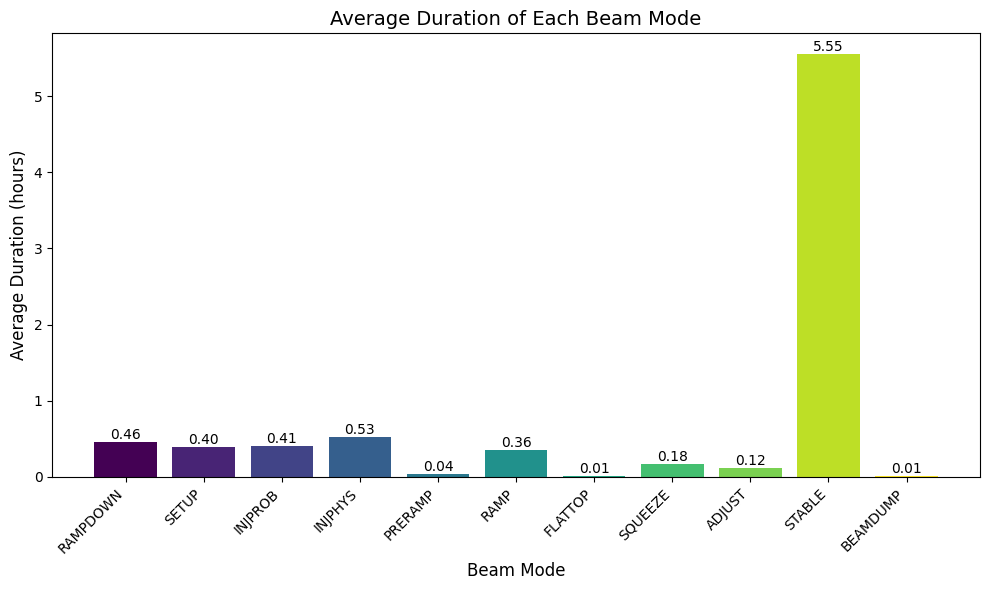

In [ ]:
import numpy as np 

plt.figure(figsize=(10, 6))
bars = plt.bar(
    mode_durations.keys(),
    mode_durations.values(),
    color=plt.cm.viridis(np.linspace(0, 1, len(mode_durations))),
)

plt.xlabel("Beam Mode", fontsize=12)
plt.ylabel("Average Duration (hours)", fontsize=12)
plt.title("Average Duration of Each Beam Mode", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


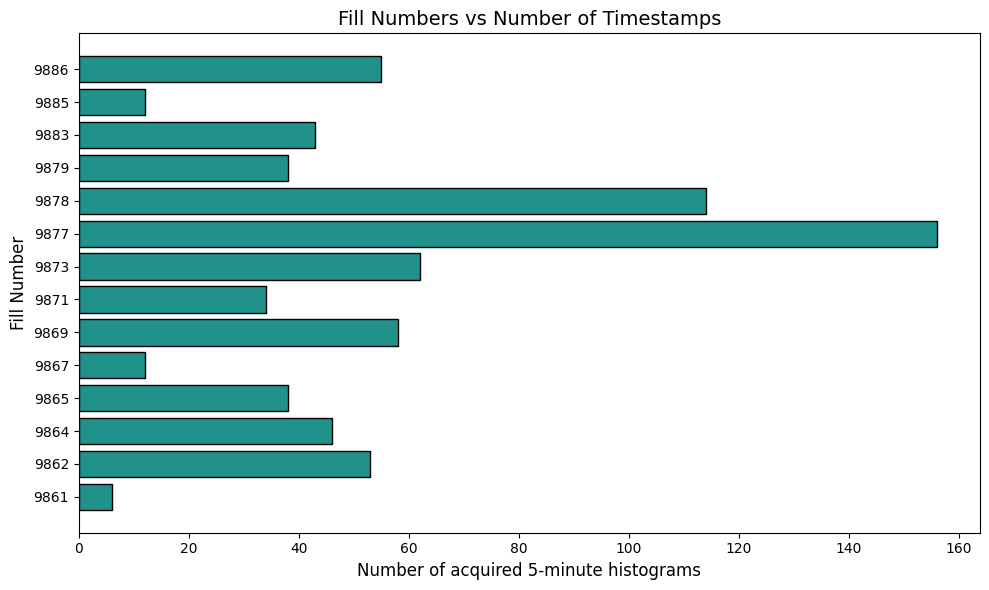

Total number of 5-minute durations available: 727

Total duration of acquisition: 3635 minutes

Total duration of acquisition: 60.58 hours


In [ ]:
# Create a horizontal bar plot with equally spaced y-axis treating fills as categorical
plt.figure(figsize=(10, 6))

# Filter data for fill numbers not equal to 9880
filtered_fill_numbers = [fill for fill in fill_numbers if fill != 9880]
filtered_counts = [counts[i] for i in range(len(fill_numbers)) if fill_numbers[i] != 9880]

# Create barh plot
plt.barh(
    range(len(filtered_fill_numbers)),
    filtered_counts,
    color=plt.cm.viridis(0.5),
    edgecolor='black',
    height=0.8
)

# Add titles and labels
plt.title('Fill Numbers vs Number of Timestamps', fontsize=14)
plt.xlabel('Number of acquired 5-minute histograms', fontsize=12)
plt.ylabel('Fill Number', fontsize=12)

# Set y-ticks as categorical
plt.yticks(
    ticks=range(len(filtered_fill_numbers)),
    labels=filtered_fill_numbers,
    fontsize=10
)
plt.xticks(fontsize=10)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

# Calculate and print summary statistics
total_durations = sum(filtered_counts) * 5
total_hours = total_durations / 60

print("Total number of 5-minute durations available:", sum(filtered_counts))
print("\nTotal duration of acquisition:", total_durations, "minutes")
print("\nTotal duration of acquisition: {:.2f} hours".format(total_hours))


# Data Visualization of Variables in one Fill

In [8]:
def get_nested_value(data, nested_keys):
    """
    Safely retrieves the value from a nested dictionary using a list of keys.

    Args:
        data (dict): The dictionary to traverse.
        nested_keys (list): A list of keys to follow for nested access.

    Returns:
        The value at the specified nested location, or None if any key is missing.
    """
    try:
        for key in nested_keys:
            if isinstance(data, dict) and key in data:
                data = data[key]
            else:
                return None
        return data
    except Exception as e:
        print(f"Error accessing nested value: {e}")
        return None
    
example_data = {
    "level1": {
        "level2": {
            "level3": {
                "key": "value"
            },
            "another_key": 42
        }
    }
}

# Example usage
nested_keys = ["level1", "level2", "level3", "key"]
result = get_nested_value(example_data, nested_keys)

print(f"Extracted value: {result}")  # Output: Extracted value: value

# Another example with a missing key
nested_keys_missing = ["level1", "level2", "another_key"]
result_missing = get_nested_value(example_data, nested_keys_missing)

print(f"Extracted value for missing key: {result_missing}")  # Output: Extracted value for missing key: None

Extracted value: value
Extracted value for missing key: 42


In [7]:
import json
from datetime import datetime

def get_mode_starts_from_one_fill(fills_path, fill_number):
    """
    Extracts beam mode start times for a specified fill number from a JSON file.
    
    Args:
        fills_path (str): Path to the JSON file containing beam mode information.
        fill_number (int): The fill number to extract data for.
        
    Returns:
        dict: A dictionary where keys are modes and values are their start times.
    """
    with open(fills_path, 'r') as json_file:
        beam_mode_data = json.load(json_file)

    start_times_of_modes = {
        mode.get('mode'): datetime.utcfromtimestamp(mode.get('startTime')).strftime('%Y-%m-%d %H:%M:%S')
        for item in beam_mode_data if item.get('fillNumber') == fill_number
        for mode in item.get('beamModes')
    }
    
    return start_times_of_modes

get_mode_starts_from_one_fill(fills_filepath, fill_number)


{'RAMPDOWN': '2024-07-05 22:15:05',
 'SETUP': '2024-07-05 15:05:57',
 'INJPROB': '2024-07-05 16:08:03',
 'INJPHYS': '2024-07-05 16:18:05',
 'PRERAMP': '2024-07-05 16:51:59',
 'RAMP': '2024-07-05 16:54:58',
 'FLATTOP': '2024-07-05 17:16:16',
 'SQUEEZE': '2024-07-05 17:16:26',
 'ADJUST': '2024-07-05 17:25:25',
 'STABLE': '2024-07-05 17:31:52',
 'BEAMDUMP': '2024-07-05 22:15:02'}

In [5]:
from sklearn.linear_model import LinearRegression
import traceback
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def plot_tdc_parameter_with_markers_and_slopes(file_path, nested_keys, parameter_label, fills_filepath, add_markers=True, slope_comparison=False):
    try:

        # Get beam mode start times if markers are needed
        start_times_of_modes = []
        start_times_of_modes = get_mode_starts_from_one_fill(fills_filepath, fill_number)

        # Load the TDC data from the pickle files
        dev_files = os.listdir(file_path)
        acquiris_file = next(file for file in dev_files if 'acquiris' in file)
        picoquant_file = next(file for file in dev_files if 'picoquant' in file)

        with open(os.path.join(file_path, acquiris_file), 'rb') as file:
            acquiris_data = pickle.load(file)

        with open(os.path.join(file_path, picoquant_file), 'rb') as file:
            picoquant_data = pickle.load(file)

        print(len(picoquant_data.keys()))
        print(len(acquiris_data.keys()))

        # Define configurations for the 2 TDCs
        tdcs = {
            "picoquant": {"data": picoquant_data, "color": "#298c8c", "label": "Picoquant"},
            "acquiris": {"data": acquiris_data, "color": "#800074", "label": "Acqiris"}
        }

        plt.figure(figsize=(12, 6))

        # Dictionary to store extracted times and parameter values for each TDC
        plot_data = {}

        for tdc_name, _ in tdcs.items():
            
                data = picoquant_data if tdc_name == "picoquant" else acquiris_data
                plot_data[tdc_name] = {"times": [], "values": []}

                for timestamp, values in data.items():
                    parameter_value = get_nested_value(values, nested_keys)                
                    try:
                        if type(parameter_value) == 'list' and len(parameter_value) == 1:
                            parameter_value = float(parameter_value)
                            
                        # Adjust for specific parameters in Picoquant
                        if nested_keys[-1] in ['bucket_width', 'bucket_offset'] and tdc_name == 'picoquant':
                            parameter_value /= 2

                            
                        if nested_keys[-1] in ['fwhm'] and 'Bunch_dict' in nested_keys:
                            if tdc_name == 'picoquant':
                                parameter_value = parameter_value.mean() * 25e-12  # Picoquant scaling
                            else:
                                parameter_value = parameter_value.mean() * 50e-12  # Acqiris scaling
            
                        # # Use for the plot only the timestamps between the RAMP and the BEAMDUMP of the fill 
                        # ramp_start = datetime.strptime(start_times_of_modes['RAMP'], "%Y-%m-%d %H:%M:%S")
                        # beamdump_start = datetime.strptime(start_times_of_modes['BEAMDUMP'], "%Y-%m-%d %H:%M:%S")
                        event_time = datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%S")

                        # if ramp_start <= event_time <= beamdump_start:
                        plot_data[tdc_name]["times"].append(event_time.timestamp())
                        plot_data[tdc_name]["values"].append(parameter_value)
                            
                    except (ValueError, TypeError) as e:
                        traceback.print_exc()
            
        # Plot the data 
        
        plt.figure(figsize=(14, 8))

        slopes = {}

        for tdc_name, tdc_data in plot_data.items():
            if tdc_data["times"] and tdc_data["values"]:  
                plt.scatter(
                    tdc_data["times"],
                    tdc_data["values"],
                    color=tdcs[tdc_name]["color"],
                    label=tdcs[tdc_name]["label"]
                )

            if slope_comparison:
                times_np = np.array(tdc_data["times"]).reshape(-1, 1)
                values_np = np.array(tdc_data["values"])

                reg = LinearRegression().fit(times_np, values_np)
                slope = reg.coef_[0]
                slopes[tdc_name] = slope

                # Plot regression line
                regression_line = reg.predict(times_np)
                plt.plot(
                    tdc_data["times"],
                    regression_line,
                    linestyle='-',
                    color=tdcs[tdc_name]["color"],
                    label=f"{tdcs[tdc_name]['label']} Slope: {slope:.2e}"
                )

        if add_markers:
            # Filter modes between RAMP and BEAMDUMP
            keys = list(start_times_of_modes.keys())
            ramp_index = keys.index('RAMP')
            stable_index = keys.index('BEAMDUMP')
            selected_keys = keys[ramp_index:stable_index + 1]
            selected_modes = {key: start_times_of_modes[key] for key in selected_keys}

            # Set up colormap
            mode_start_colors = cm.get_cmap('viridis', len(selected_modes))
            start_handles = []
            timestamp_labels = []

            # Iterate over filtered modes
            for i, (mode_name, mode_start_time) in enumerate(selected_modes.items()):
                mode_start_time_utc = datetime.strptime(mode_start_time, "%Y-%m-%d %H:%M:%S").timestamp()

                # Plot vertical line for each mode
                start_line = plt.axvline(
                    x=mode_start_time_utc, color=mode_start_colors(i), linestyle='--'
                )
                start_handles.append(start_line)
                timestamp_labels.append(f"{mode_name}")

            # Collect handles and labels for TDC scatter plots
            tdc_handles, tdc_labels = plt.gca().get_legend_handles_labels()
            combined_handles = tdc_handles + start_handles
            combined_labels = tdc_labels + timestamp_labels
            plt.legend(
                combined_handles,
                combined_labels,
                loc='center right',
                bbox_to_anchor=(1, 0.5)
            )
            
        else: 
            tdc_legend = plt.legend(title="TDCs", loc='center right', bbox_to_anchor=(1, 0.35))
                        
        plt.gca().set_xticks(plt.gca().get_xticks())
        xtick_labels = [datetime.utcfromtimestamp(t).strftime('%H:%M:%S') for t in plt.gca().get_xticks()]
        plt.gca().set_xticklabels(xtick_labels)

        plt.xlabel("Time (UTC)")
        plt.ylabel(parameter_label)
        plt.title(f"{parameter_label} Over Time for Picoquant and Acqiris TDCs (Fill {fill_number})")

        # Calculate y-axis limits
        all_values = []
        for tdc_name, tdc_data in plot_data.items():
            all_values.extend(tdc_data["values"])  # Collect all values from both TDCs

        if all_values:
            y_min = min(all_values)
            y_max = max(all_values)
            y_range = y_max - y_min
            y_margin = 0.2 * y_range  # 20% of the range
            y_min_limit = y_min - y_margin
            y_max_limit = y_max + y_margin

            # Apply the calculated limits
            plt.ylim(y_min_limit, y_max_limit)
        
        plt.grid(True)
        plt.tight_layout()
        plt.show()
                    
            
    except Exception as e:
        traceback.print_exc()

150
182


<Figure size 1200x600 with 0 Axes>

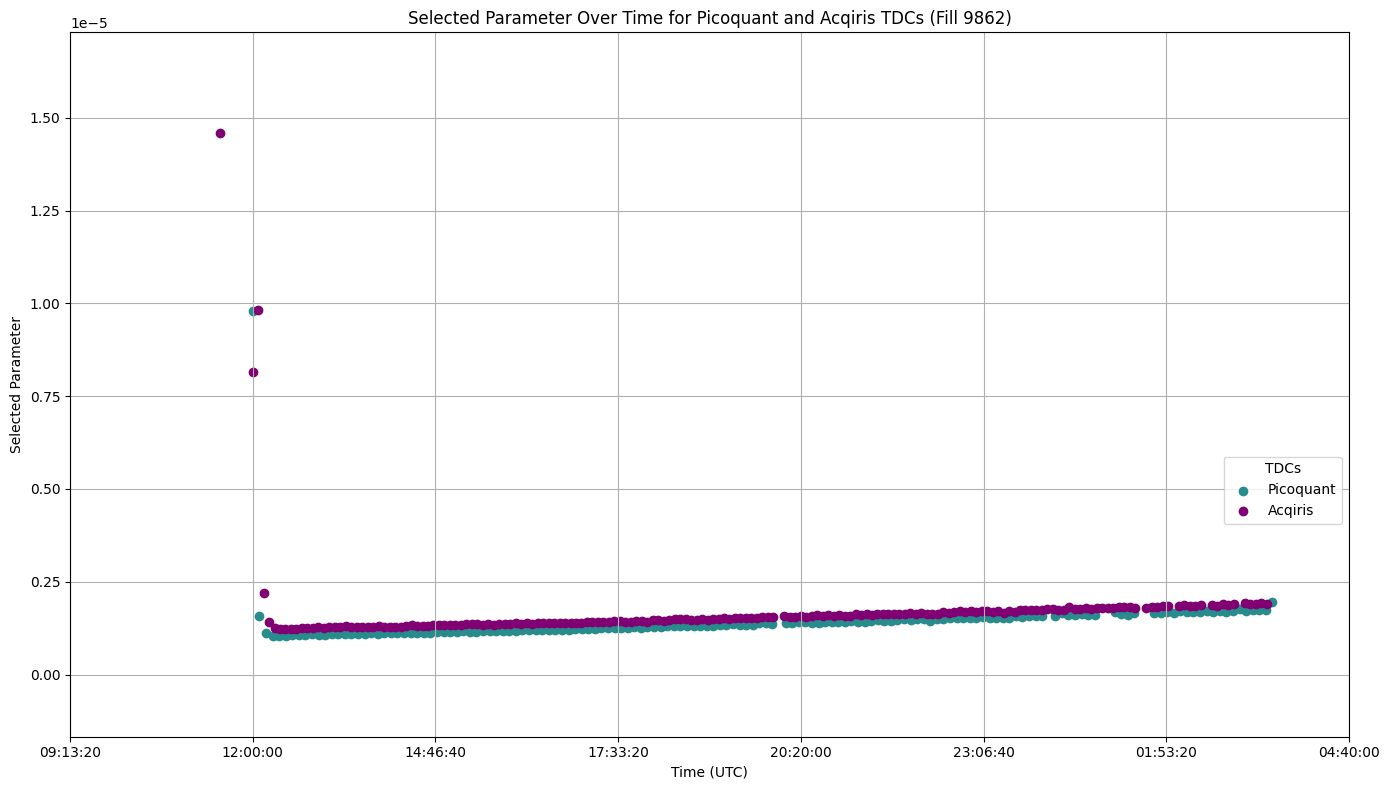

In [18]:
#nested_keys = ['Frac_dict', 'tot', 'filled', 'sigma_stat_e']
#dict_keys(['Q', 'Q_e', 'Q_inv', 'Q_inv_e', 'Q_inv_o', 'Q_o', 'Q_val', 'Q_val_e', 'Q_val_o', 'sigma', 'sigma_stat', 'sigma_stat_e', 'sigma_stat_o', 'sigma_syst', 'sigma_syst_e', 'sigma_syst_o', 'sigma_val', 'sigma_val_e', 'sigma_val_o'])
nested_keys = ['Frac_dict', 'tot', 'sat', 'sigma']
#nested_keys = ['Bunch_dict', 'fwhm'] # Get the bunch length 
selected_fill_filepath = 'fill_9877'
parameter_label = 'Selected Parameter'


plot_tdc_parameter_with_markers_and_slopes(selected_fill_filepath, nested_keys, parameter_label, fills_filepath, add_markers=False, slope_comparison=False)

In [10]:
def get_all_valid_paths(data, current_path=None, undesired_keys=None, ignore_first_level = True):
    """
    Recursively find all valid key paths that end with a list or float.

    Args:
        data (dict): The dictionary to traverse.
        current_path (list): The current key path being built.
        undesired_keys (list): Keys to skip if they appear in the path.

    Returns:
        list: A list of valid key paths.
    """
    if current_path is None:
        current_path = []
    if undesired_keys is None:
        undesired_keys = []

    paths = []

    if isinstance(data, dict):
        for key, value in data.items():
            if any(undesired_key in key for undesired_key in undesired_keys):
                continue
            if ignore_first_level and not current_path:
                # Recurse without adding this key to the path
                paths += get_all_valid_paths(value, current_path, undesired_keys, ignore_first_level=False)
            else:
                paths += get_all_valid_paths(value, current_path + [key], undesired_keys, ignore_first_level=False)
    elif isinstance(data, (list, float, int)):
        if isinstance(data, list) and len(data) == 1:  # Include single-element lists
            paths.append(current_path)
        elif isinstance(data, (float, int)):  # Include numeric values
            paths.append(current_path)

    return paths

valid_paths = get_all_valid_paths(acquiris_data)
deduplicated_paths = []
seen = set()

for path in valid_paths:
    path_tuple = tuple(path)  
    if path_tuple not in seen:  
        deduplicated_paths.append(path) 
        seen.add(path_tuple) 

for i in deduplicated_paths:
    print(i)

['beam_number']
['bucket_width']
['bucket_offset']
['label_dict', 'is_filled']
['label_dict', 'is_sat']
['label_dict', 'is_ghost']
['label_dict', 'is_valid_bucket']
['label_dict', 'is_valid_edge']
['q_dict', 'q_tot']
['q_dict', 'q_tot_lower']
['q_dict', 'q_tot_upper']
['q_dict', 'q_bunched']
['q_dict', 'q_bunched_lower']
['q_dict', 'q_bunched_upper']
['q_dict', 'q_cent']
['q_dict', 'q_cent_lower']
['q_dict', 'q_cent_upper']
['q_dict', 'q_edge']
['q_dict', 'q_edge_lower']
['q_dict', 'q_edge_upper']
['Frac_dict', 'tot', 'filled', 'Q']
['Frac_dict', 'tot', 'filled', 'Q_e']
['Frac_dict', 'tot', 'filled', 'Q_inv']
['Frac_dict', 'tot', 'filled', 'Q_inv_e']
['Frac_dict', 'tot', 'filled', 'Q_inv_o']
['Frac_dict', 'tot', 'filled', 'Q_o']
['Frac_dict', 'tot', 'filled', 'Q_val']
['Frac_dict', 'tot', 'filled', 'Q_val_e']
['Frac_dict', 'tot', 'filled', 'Q_val_o']
['Frac_dict', 'tot', 'filled', 'sigma']
['Frac_dict', 'tot', 'filled', 'sigma_stat']
['Frac_dict', 'tot', 'filled', 'sigma_stat_e']
['Fra

In [11]:
def get_all_valid_paths(data, current_path=None, undesired_keys=None, required_keys=None, ignore_first_level=True):
    """
    Recursively find all valid key paths that end with a list or float,
    starting after the first level if specified, and filtering by required keys.

    Args:
        data (dict): The dictionary to traverse.
        current_path (list): The current key path being built.
        undesired_keys (list): Keys to skip if they appear in the path.
        required_keys (list): Keys that must appear in the path.
        ignore_first_level (bool): If True, skips the first level keys (e.g., timestamps).

    Returns:
        list: A list of unique valid key paths.
    """
    if current_path is None:
        current_path = []
    if undesired_keys is None:
        undesired_keys = []
    if required_keys is None:
        required_keys = []

    paths = []

    if isinstance(data, dict):
        for key, value in data.items():
            # Skip undesired keys
            if any(undesired_key in key for undesired_key in undesired_keys):
                continue
            # Skip first level keys if `ignore_first_level` is True
            if ignore_first_level and not current_path:
                paths += get_all_valid_paths(value, current_path, undesired_keys, required_keys, ignore_first_level=False)
            else:
                paths += get_all_valid_paths(value, current_path + [key], undesired_keys, required_keys, ignore_first_level=False)
    elif isinstance(data, (list, float, int)):
        # Check if required keys are present in the path
        if all(required_key in current_path for required_key in required_keys):
            if current_path not in paths:  
                    paths.append(current_path)

    return paths


valid_paths = get_all_valid_paths(
    acquiris_data,
    required_keys=['Frac_dict', 'sat', 'tot']
)
unique_values = [list(x) for x in set(tuple(path) for path in valid_paths)]

print(unique_values)

[['Frac_dict', 'tot', 'sat', 'Q_val_o'], ['Frac_dict', 'tot', 'sat', 'sigma_syst_o'], ['Frac_dict', 'tot', 'sat', 'Q_inv_e'], ['Frac_dict', 'tot', 'sat', 'sigma_val_o'], ['Frac_dict', 'tot', 'sat', 'sigma_syst'], ['Frac_dict', 'tot', 'sat', 'Q_val'], ['Frac_dict', 'tot', 'sat', 'sigma_stat_e'], ['Frac_dict', 'tot', 'sat', 'sigma_val'], ['Frac_dict', 'tot', 'sat', 'Q_o'], ['Frac_dict', 'tot', 'sat', 'sigma_val_e'], ['Frac_dict', 'tot', 'sat', 'Q_inv'], ['Frac_dict', 'tot', 'sat', 'sigma'], ['Frac_dict', 'tot', 'sat', 'Q_inv_o'], ['Frac_dict', 'tot', 'sat', 'sigma_stat'], ['Frac_dict', 'tot', 'sat', 'Q'], ['Frac_dict', 'tot', 'sat', 'Q_val_e'], ['Frac_dict', 'tot', 'sat', 'sigma_syst_e'], ['Frac_dict', 'tot', 'sat', 'sigma_stat_o'], ['Frac_dict', 'tot', 'sat', 'Q_e']]


46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

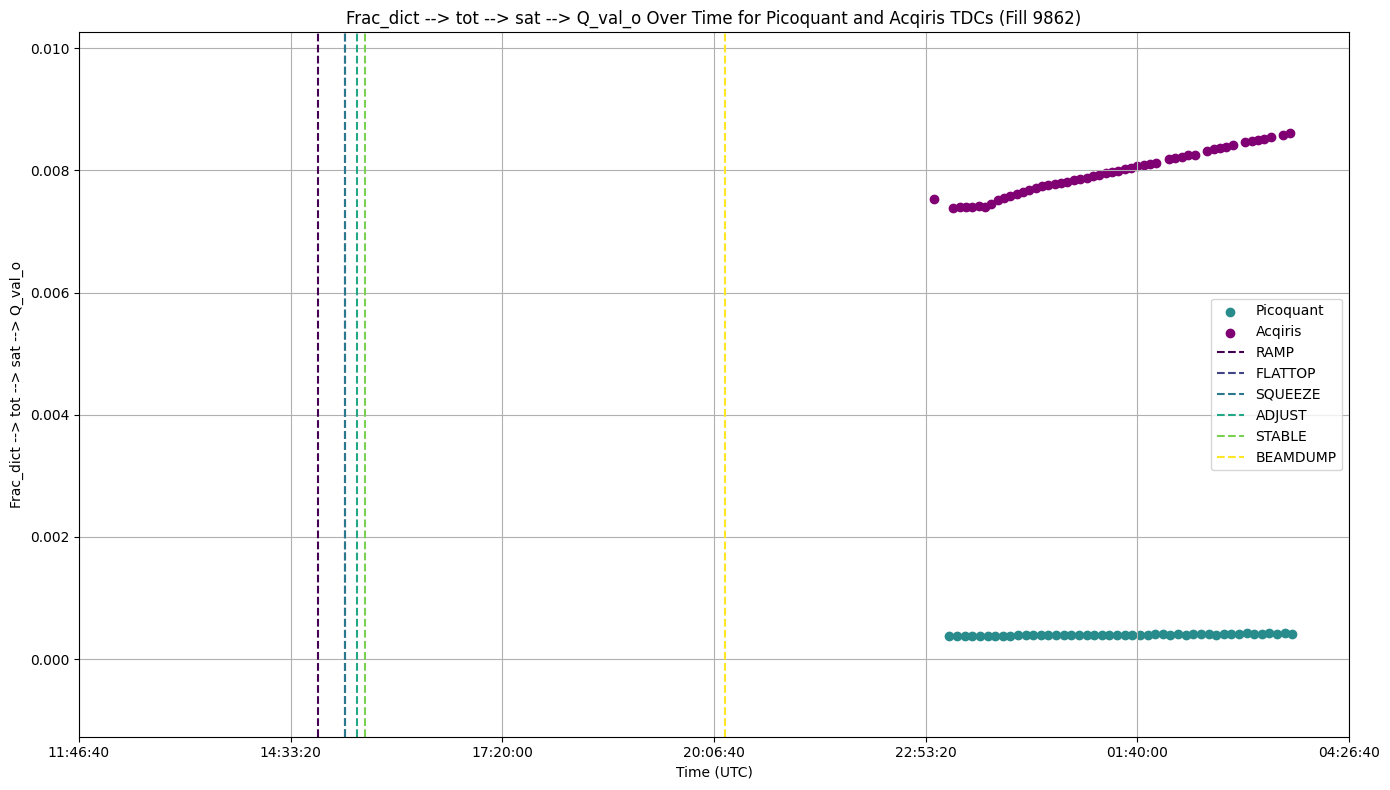

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

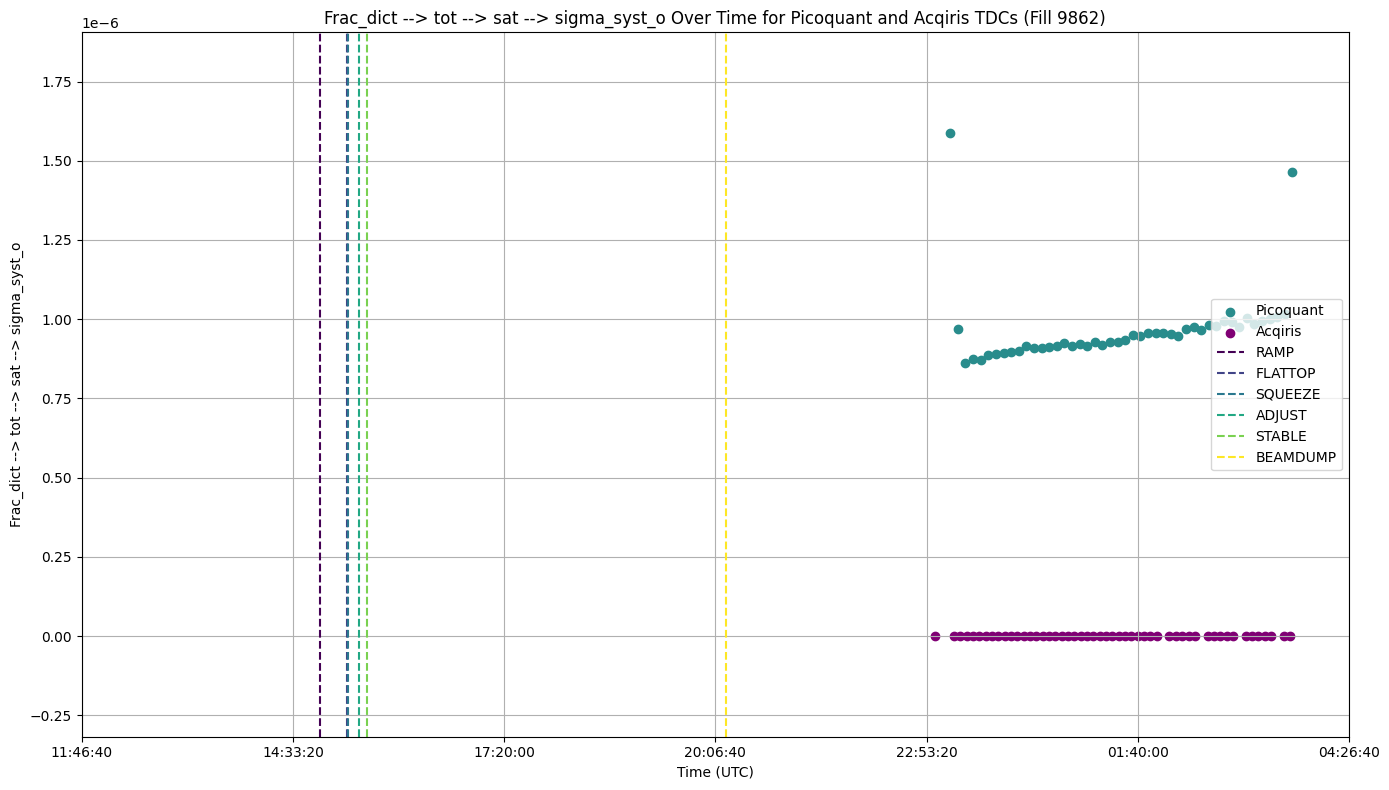

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

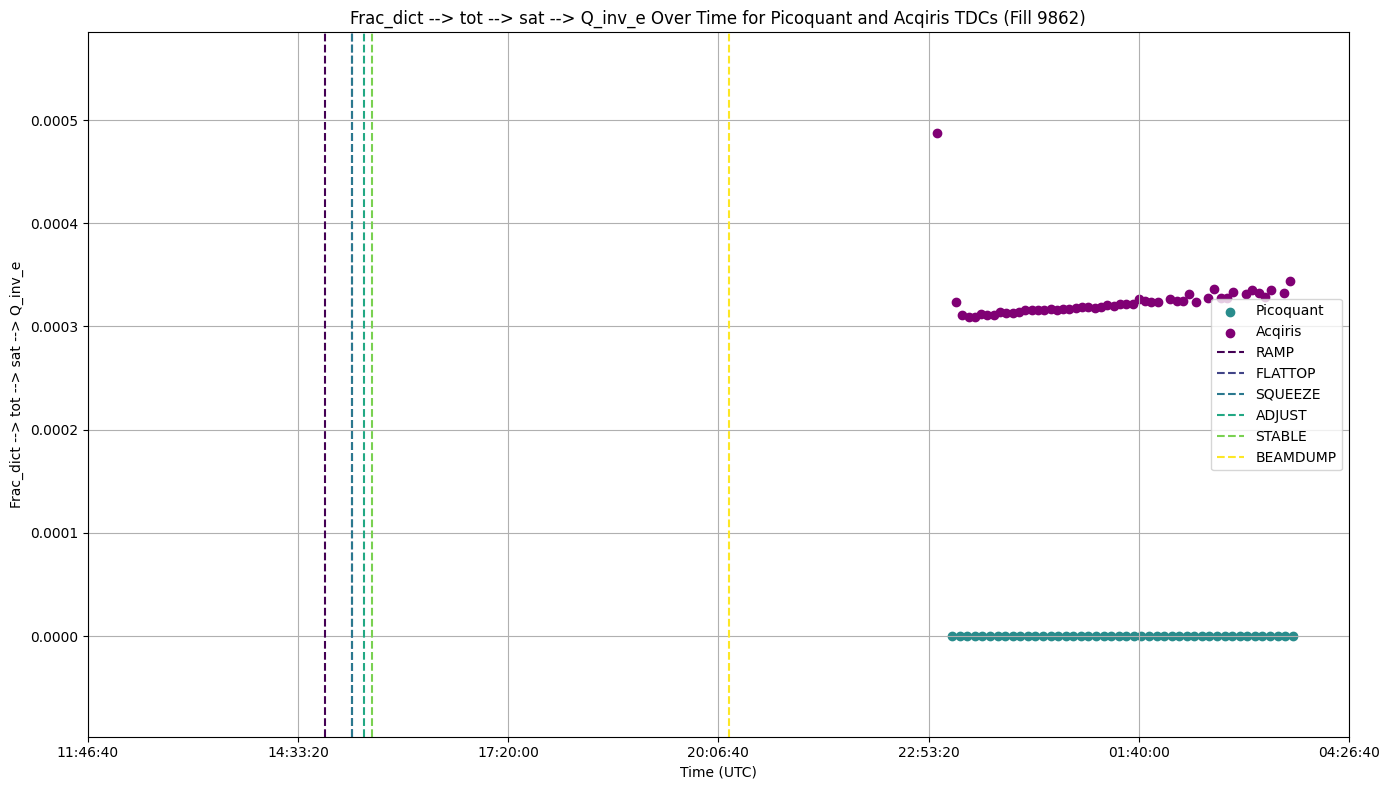

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

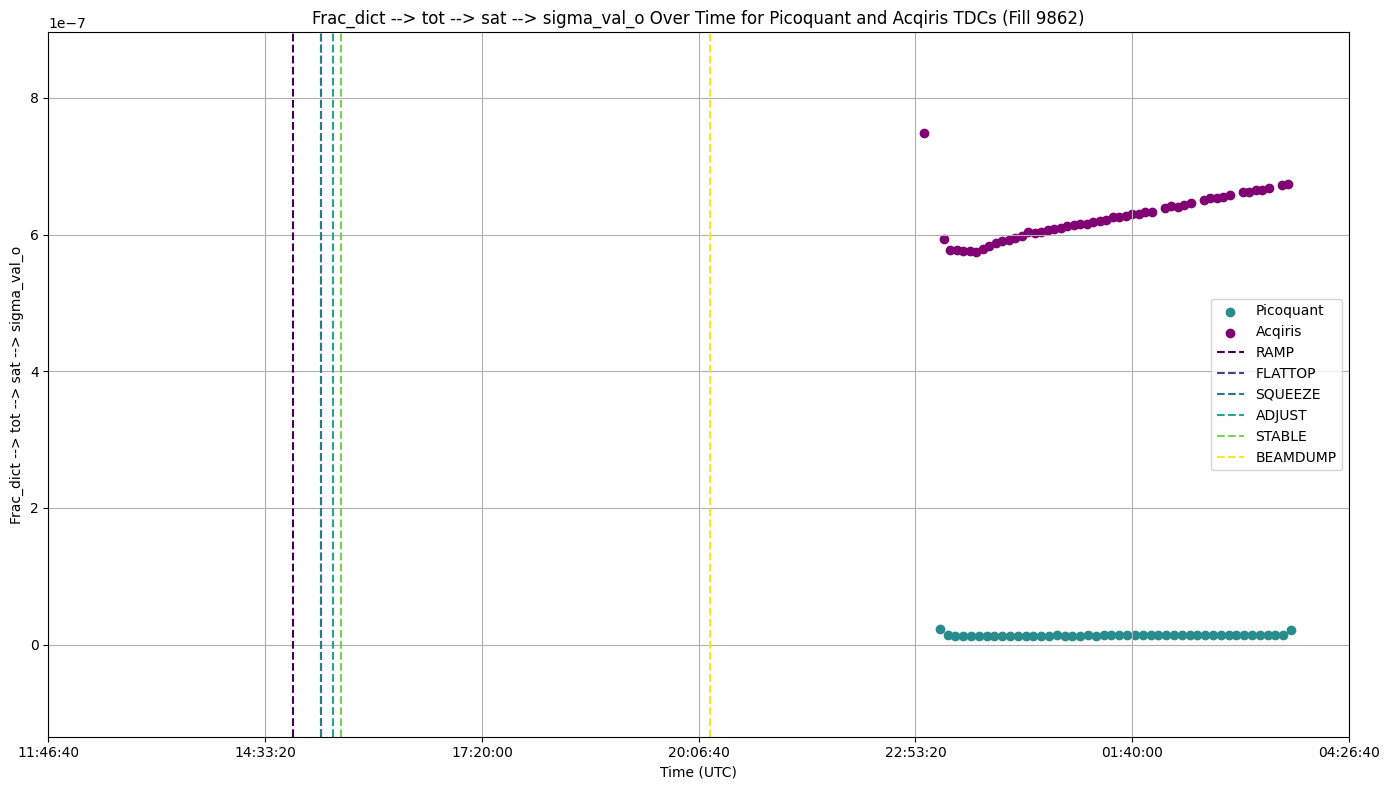

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

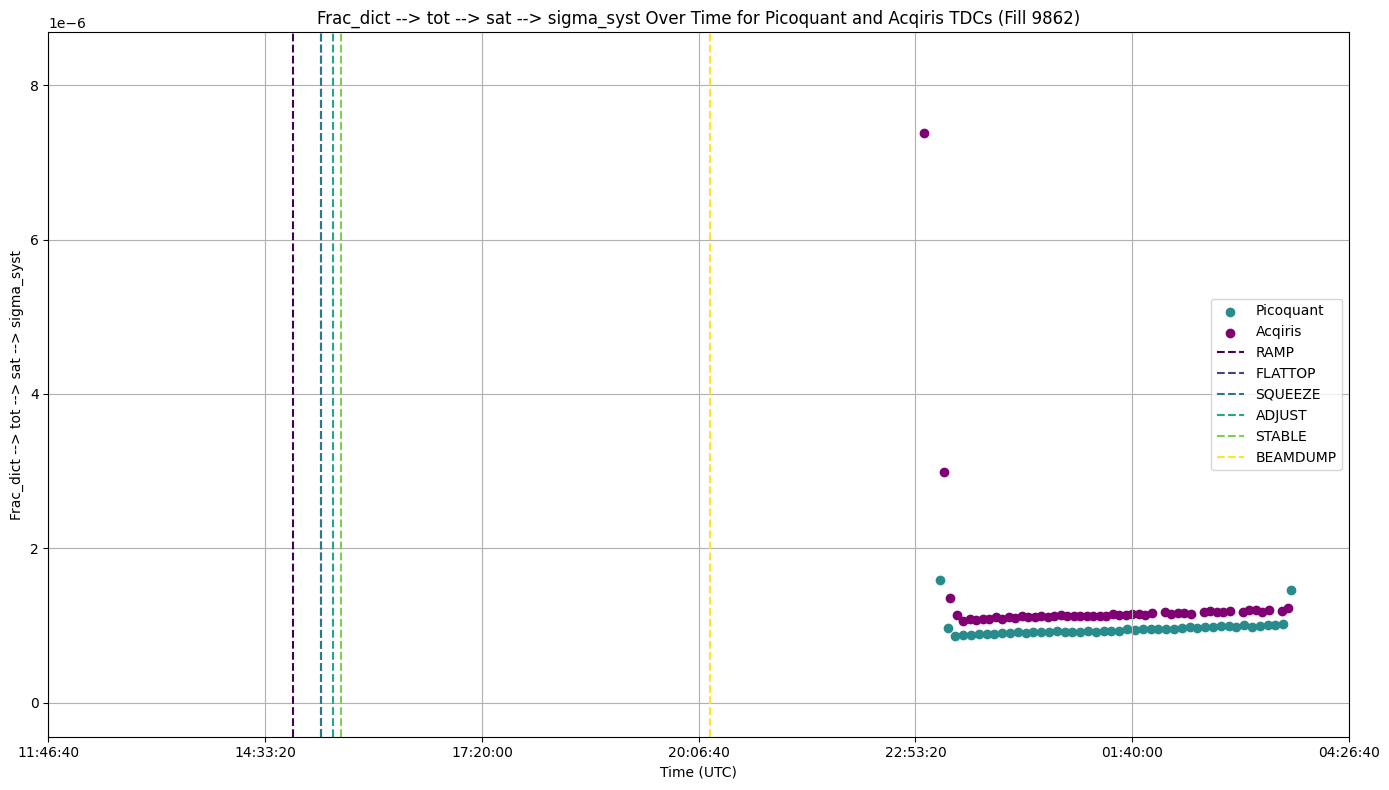

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

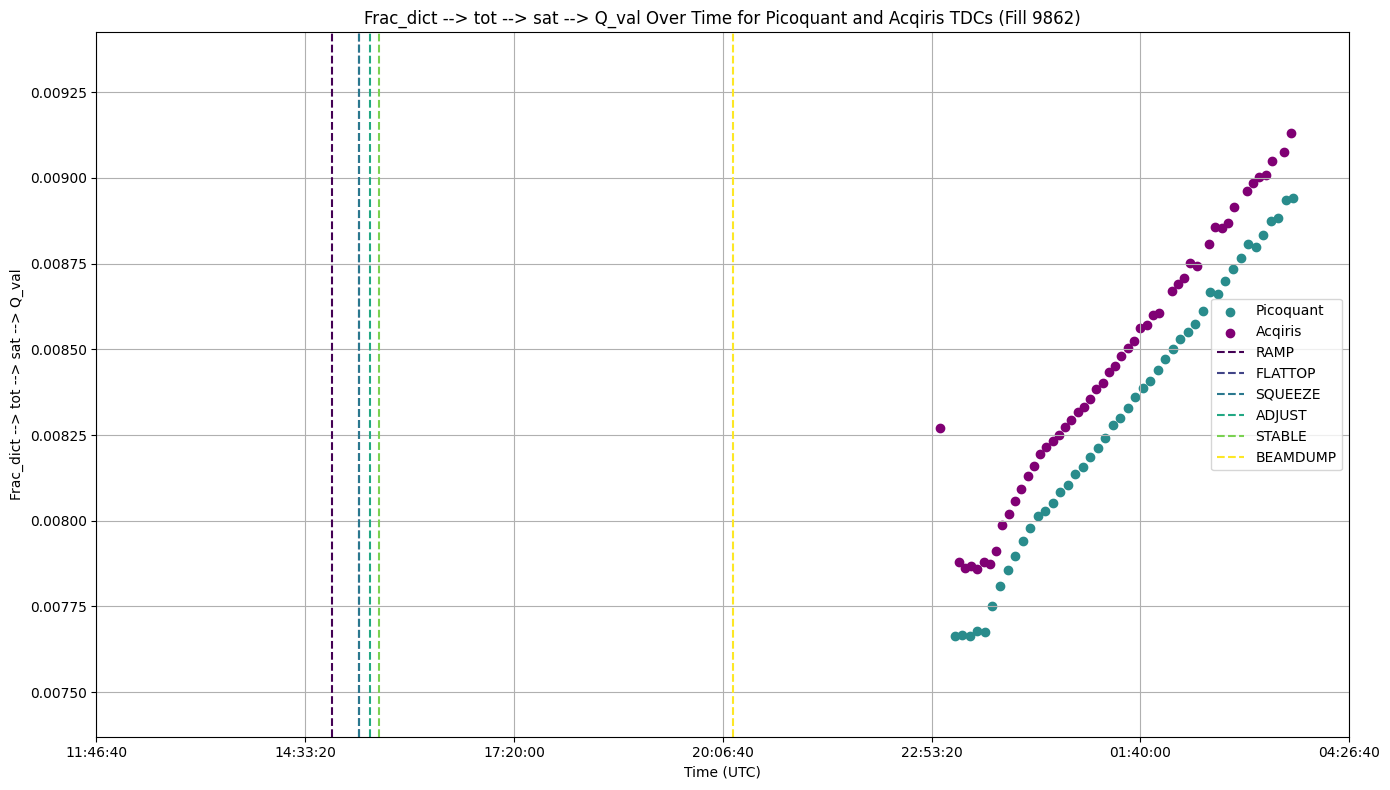

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

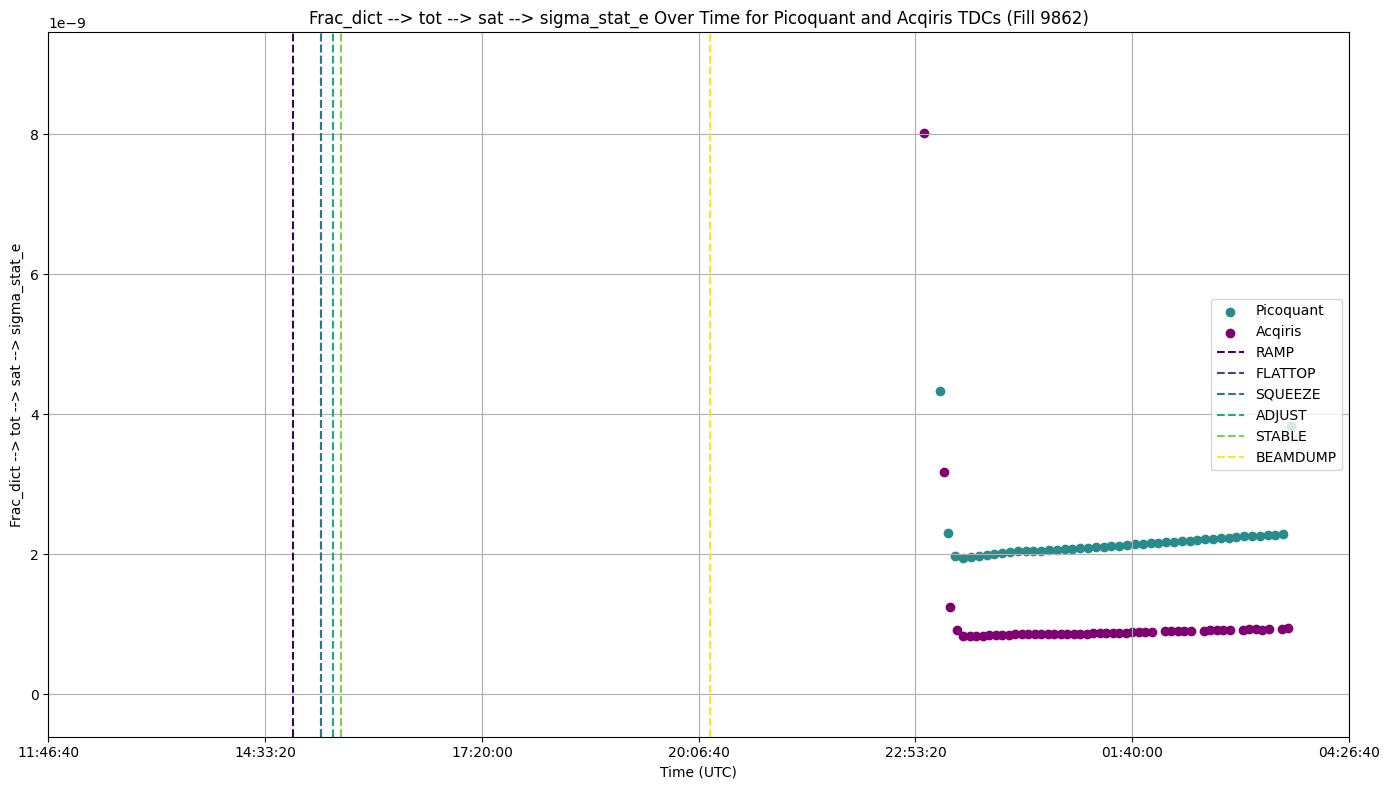

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

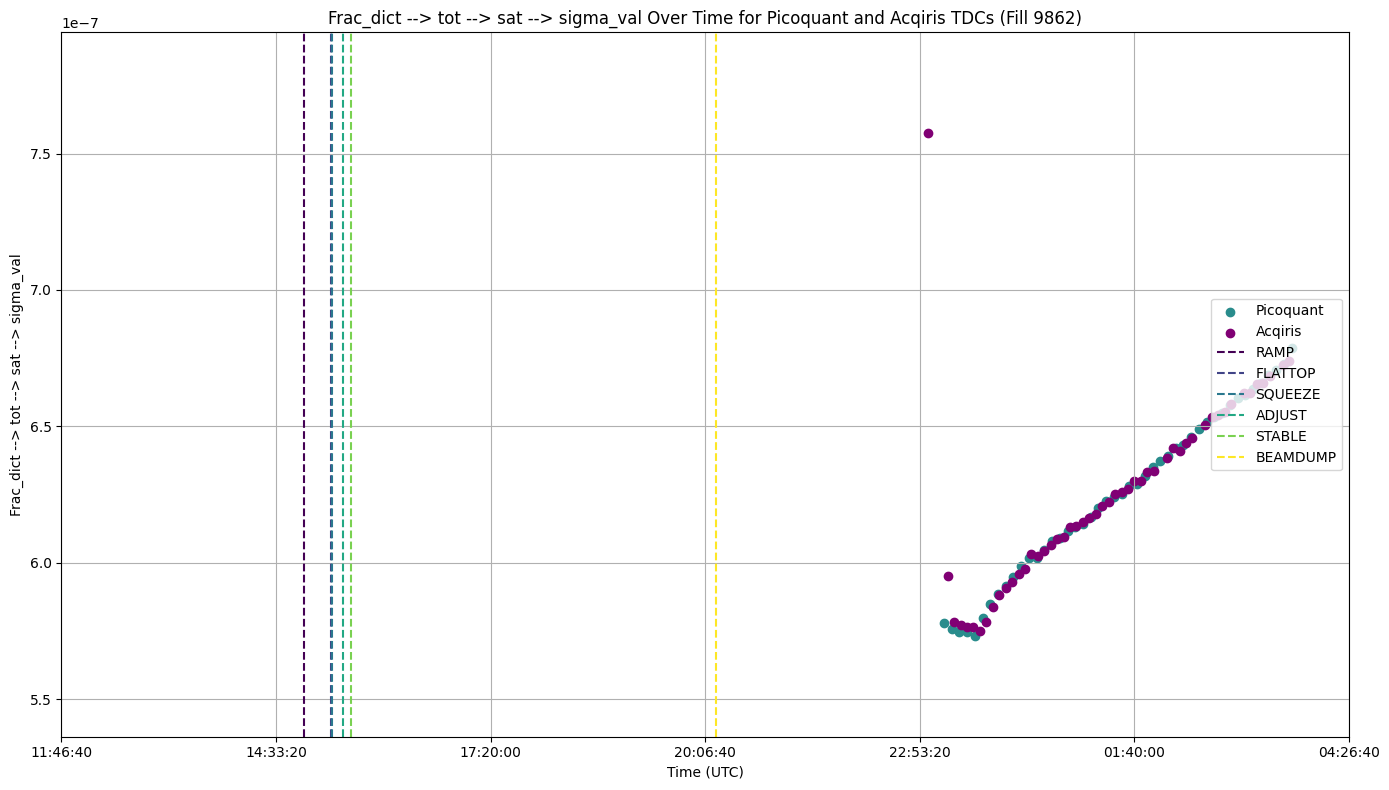

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

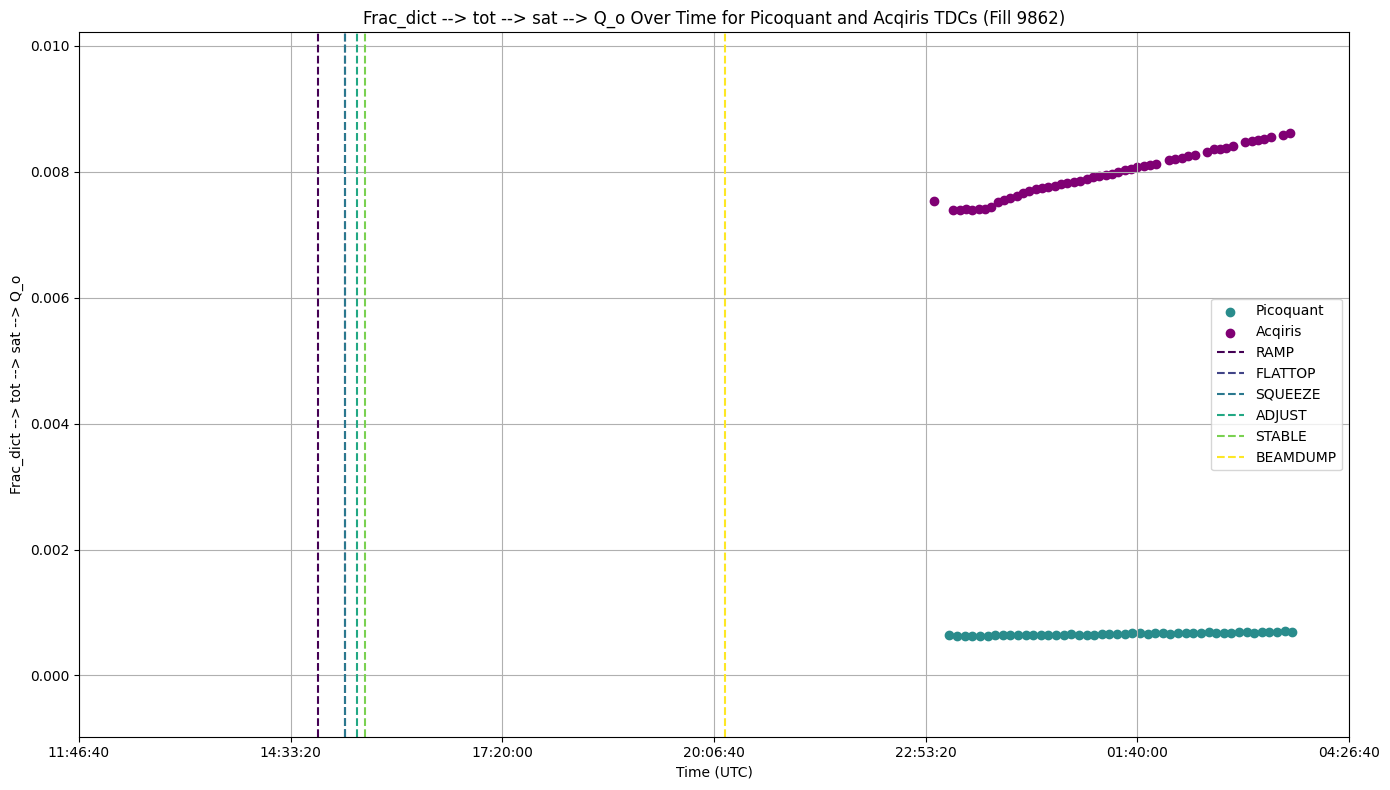

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

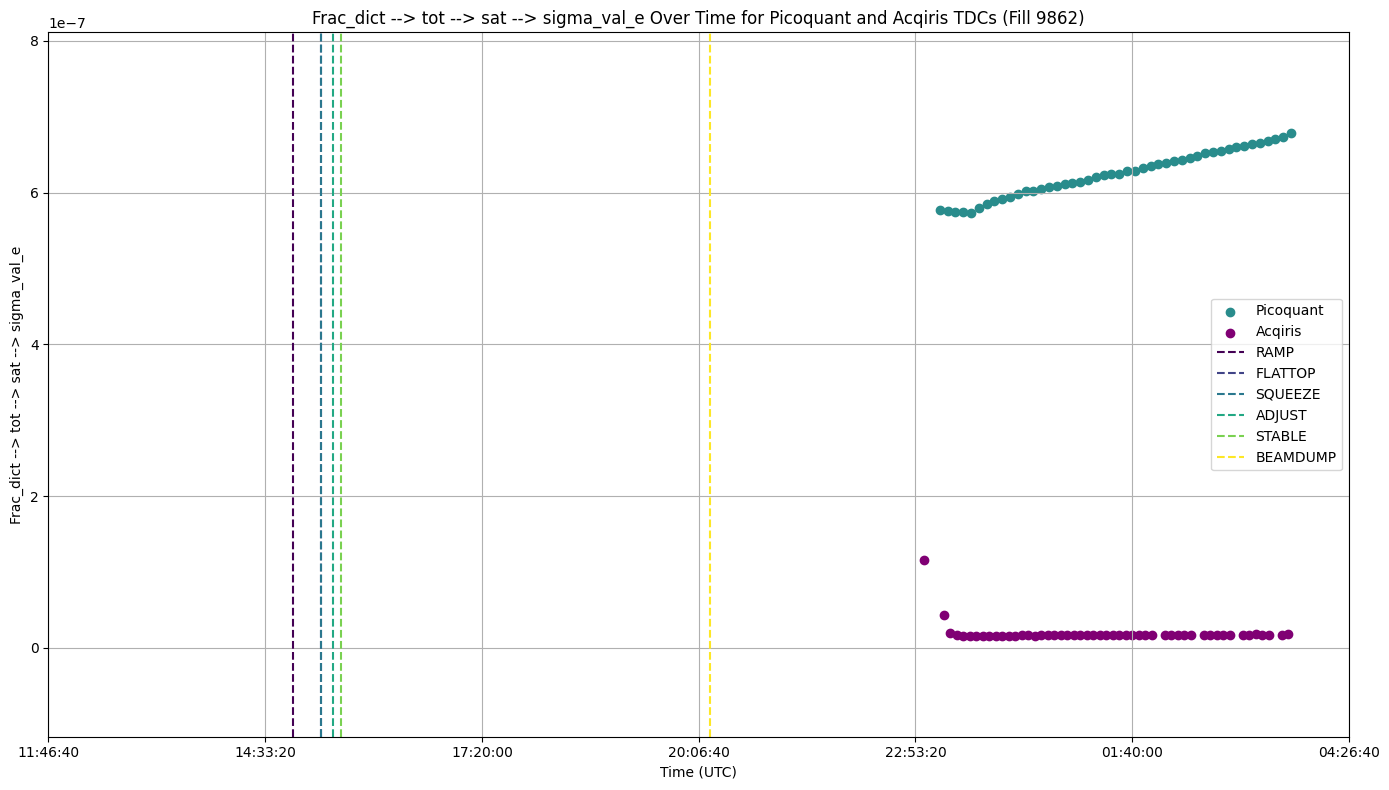

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

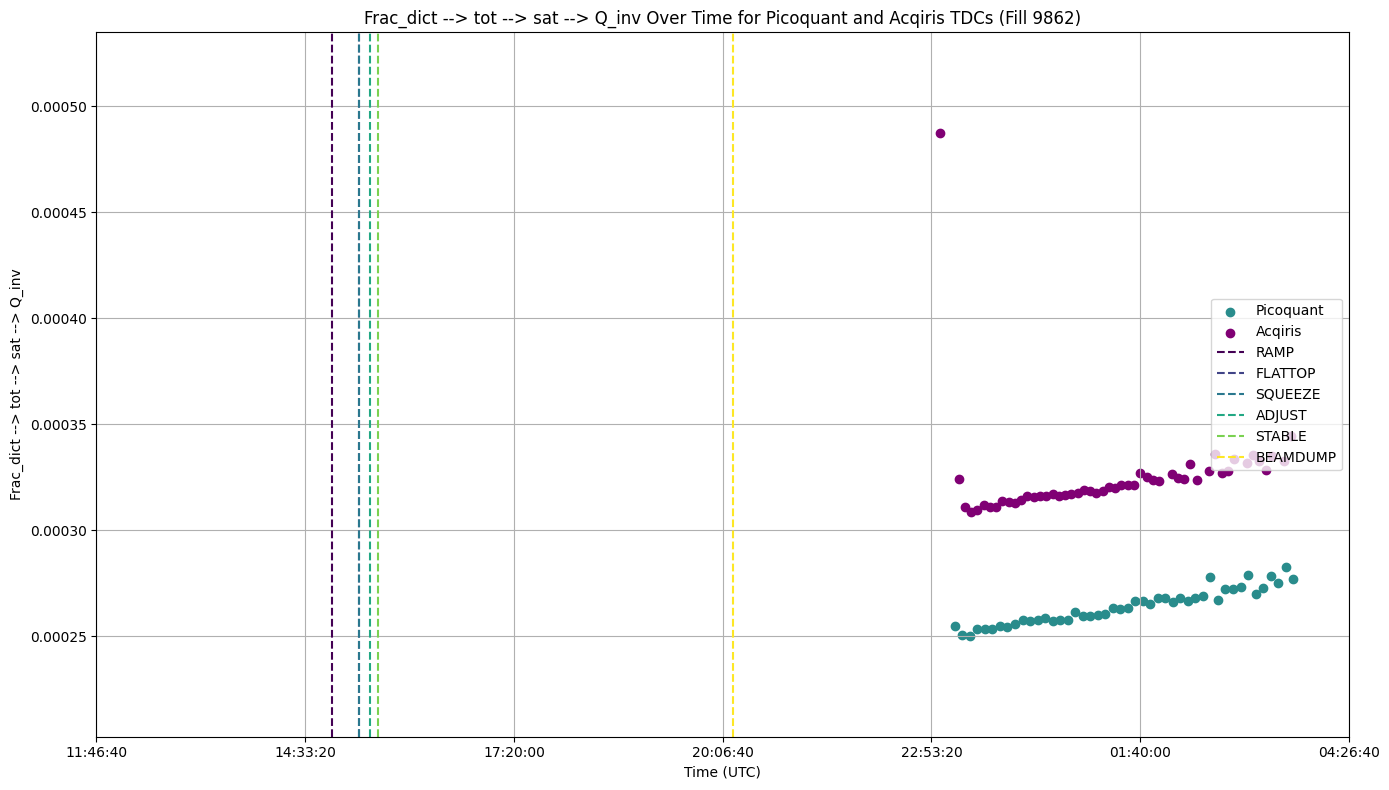

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

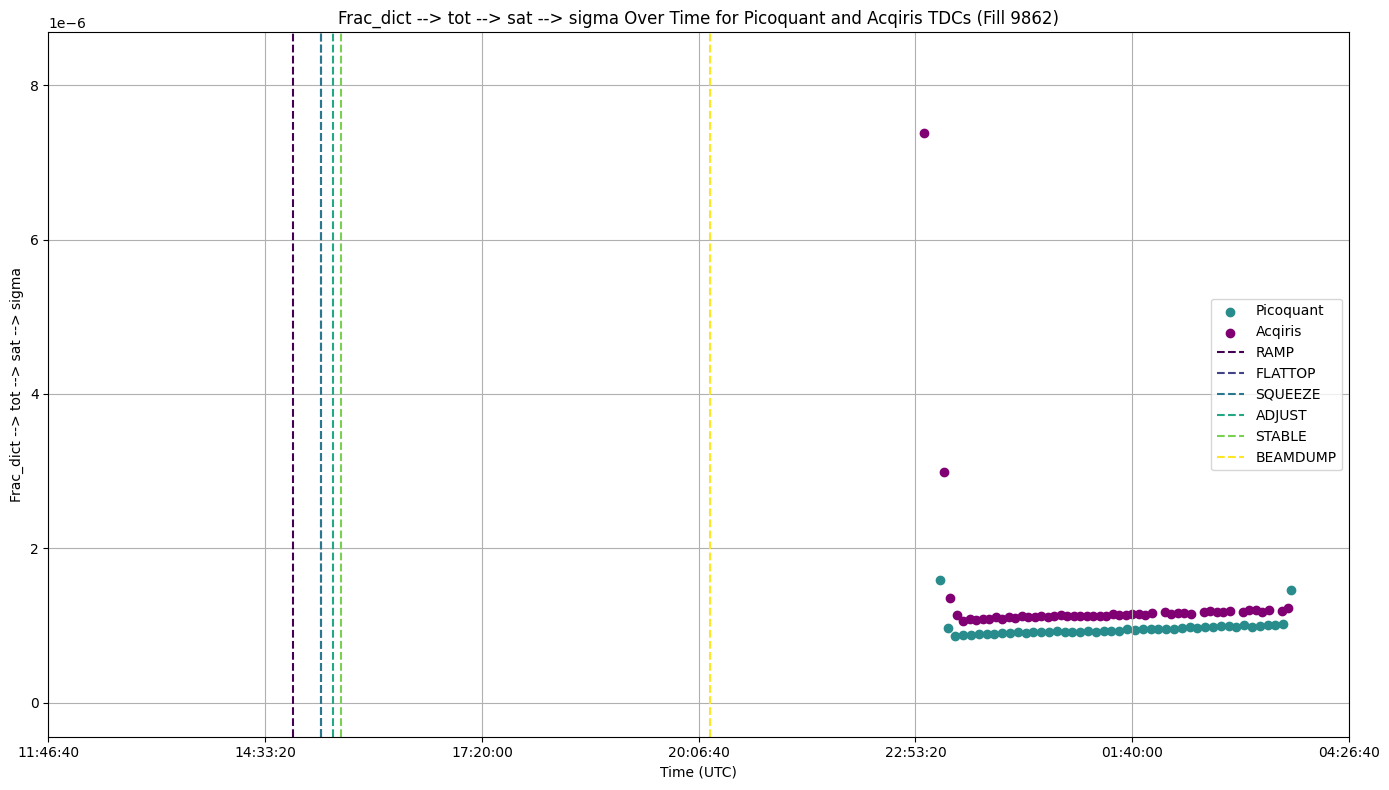

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

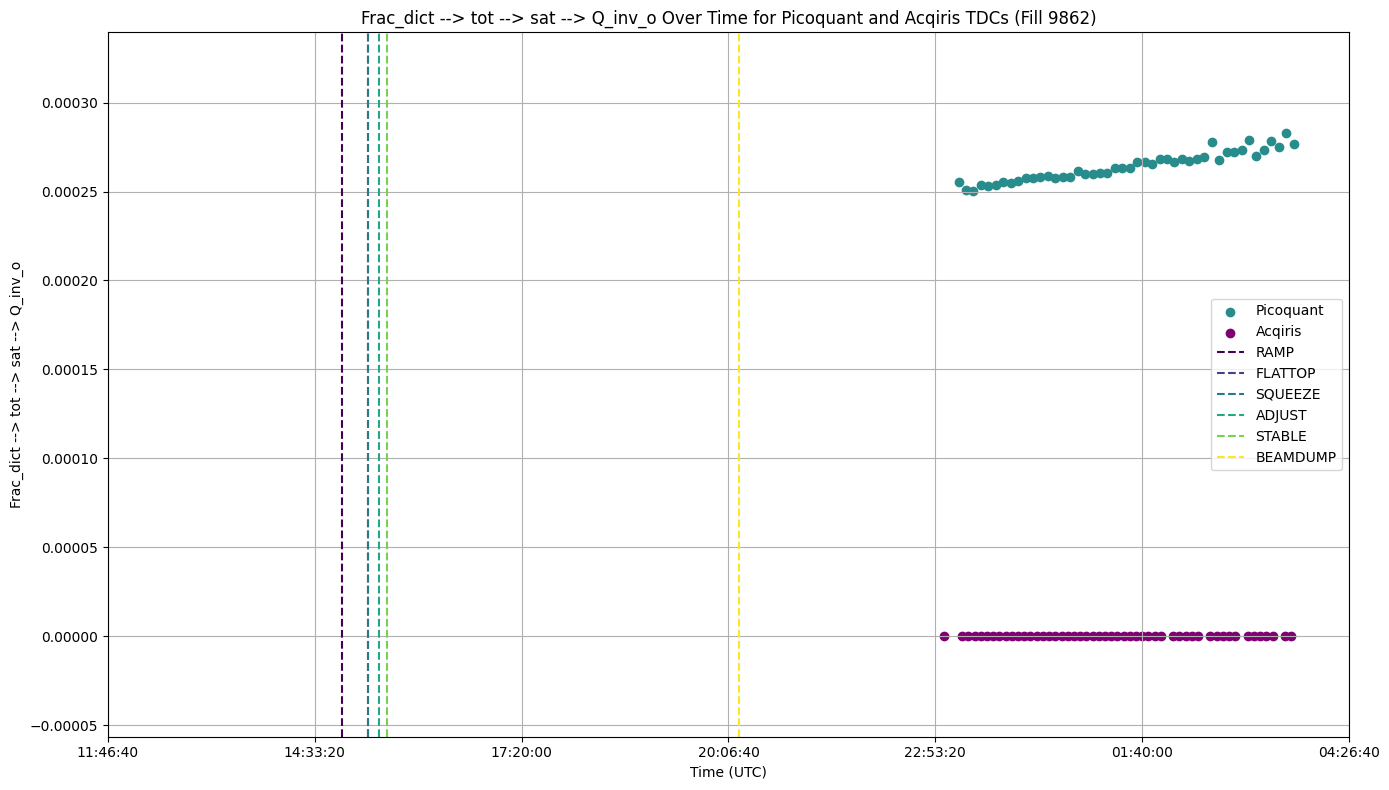

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

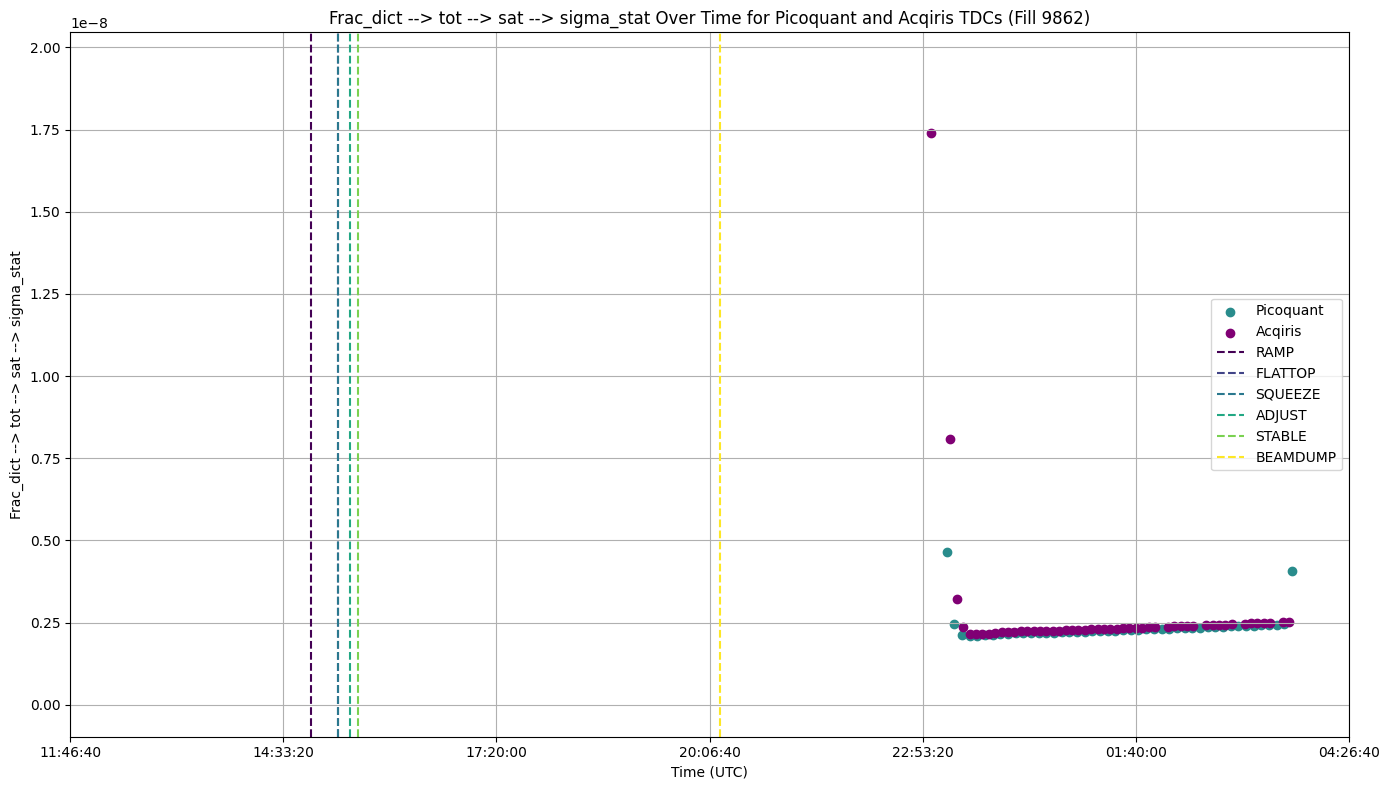

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

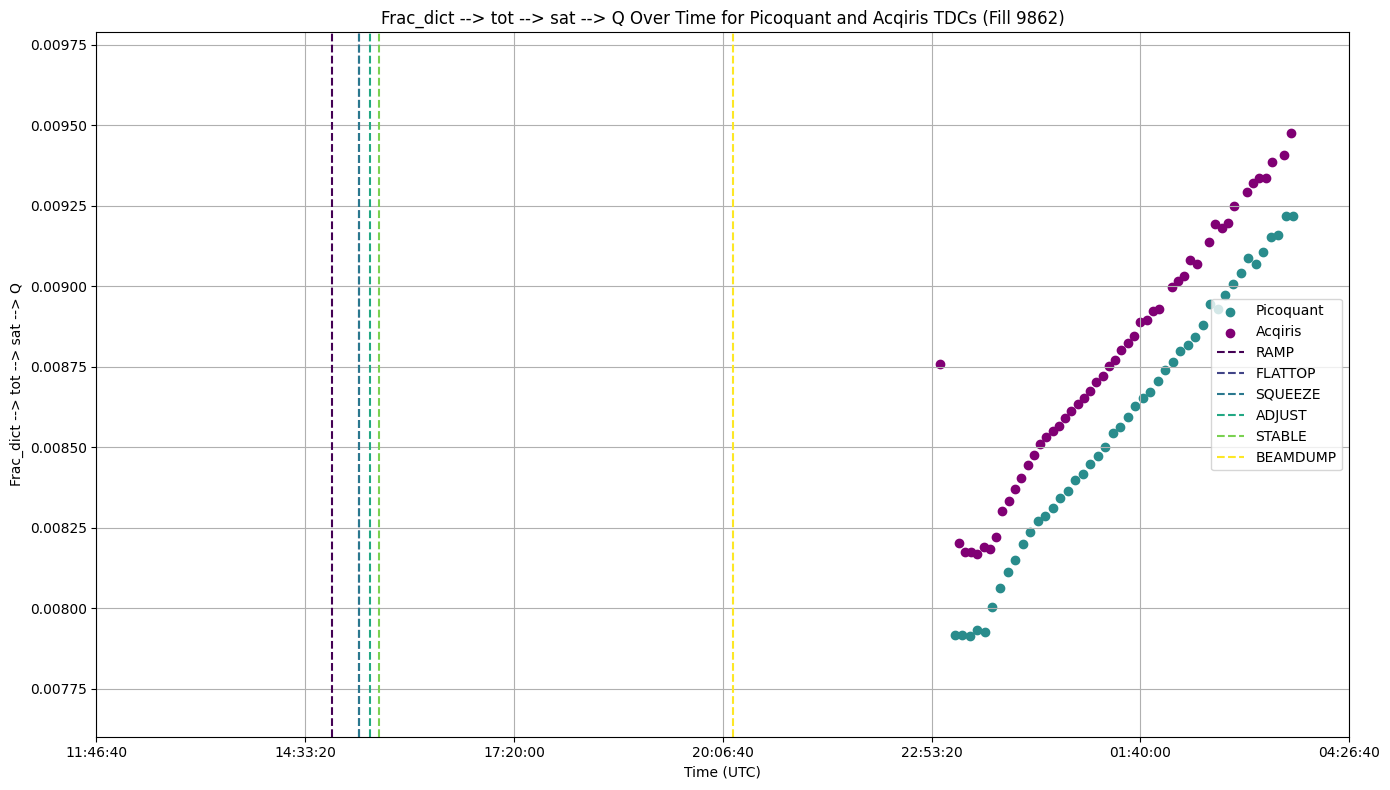

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

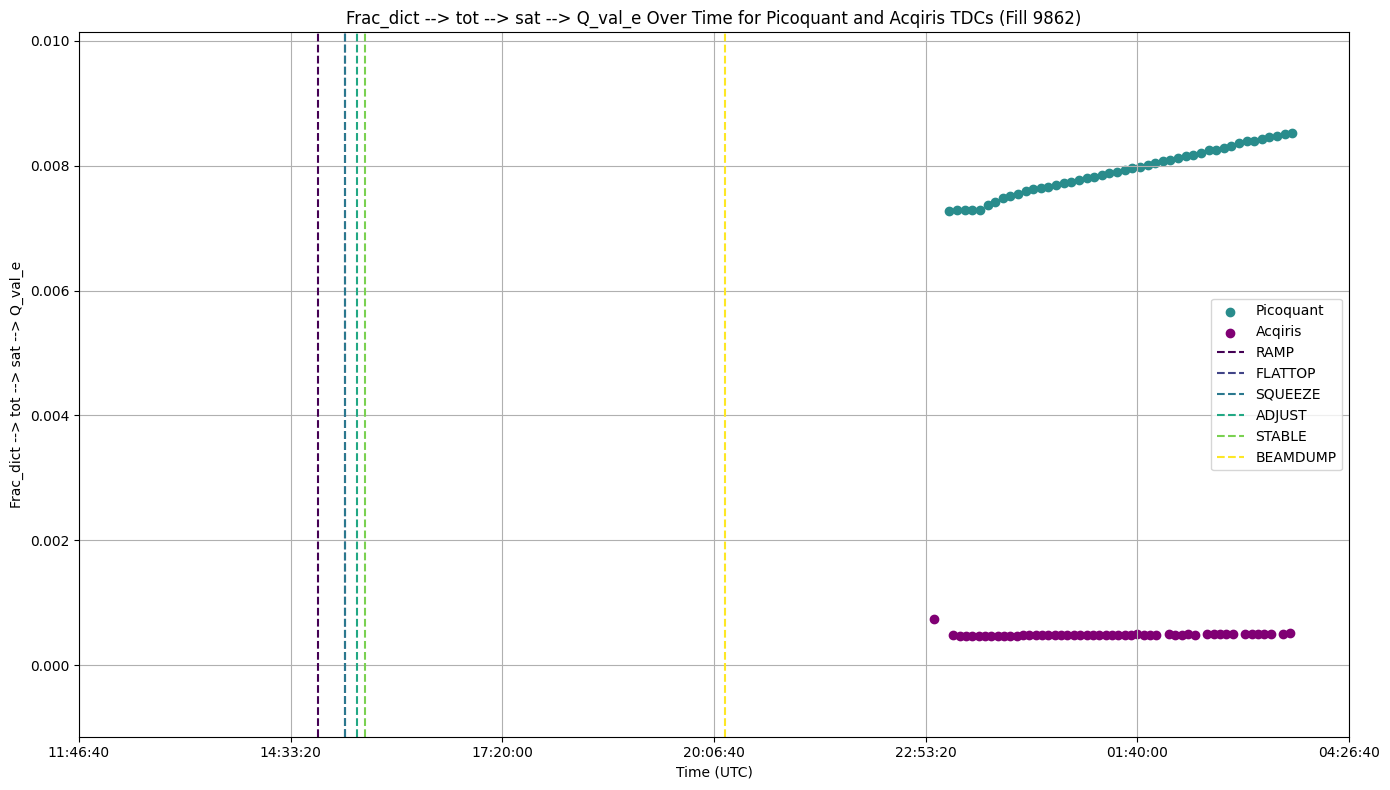

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

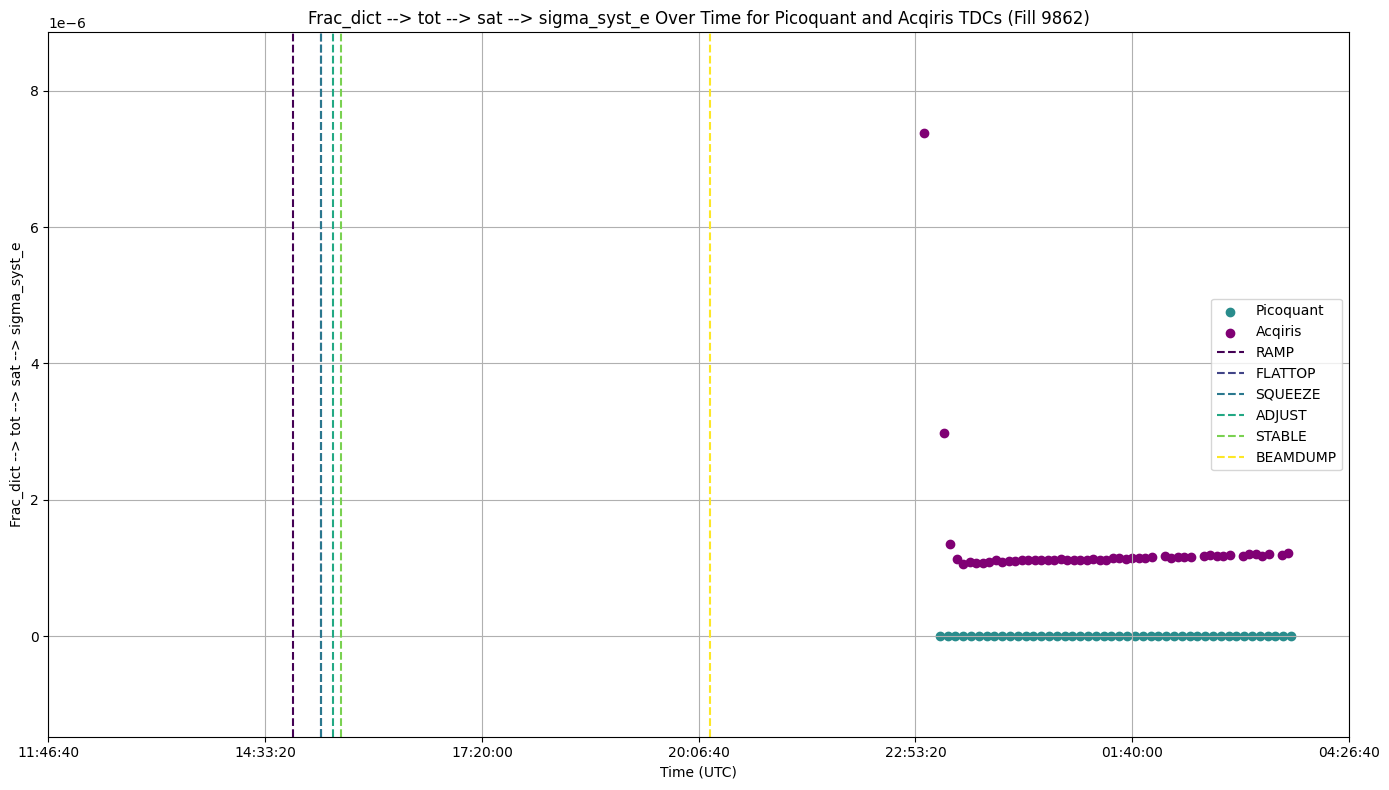

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

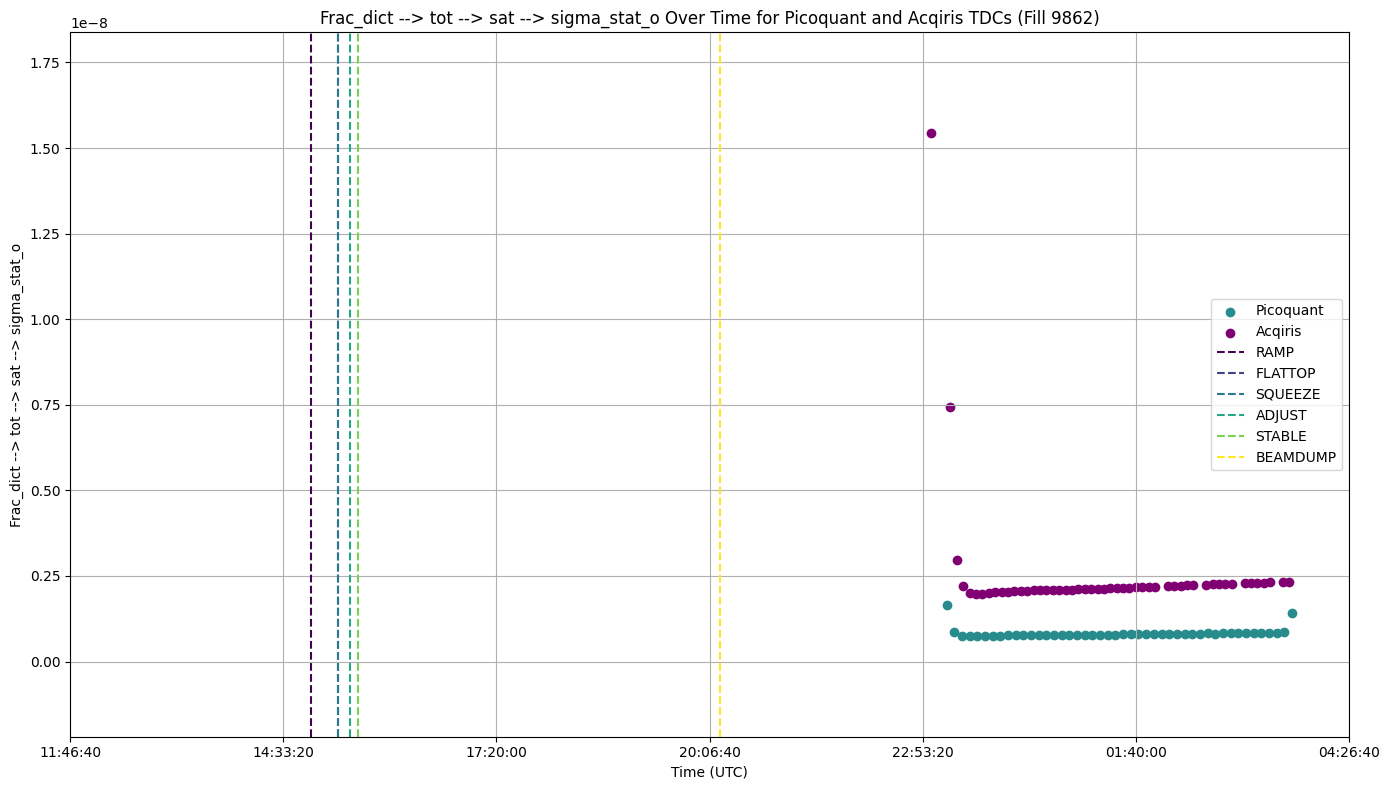

46
51


/tmp/gsourpi/ipykernel_12876/2390184273.py:114: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mode_start_colors = cm.get_cmap('viridis', len(selected_modes))


<Figure size 1200x600 with 0 Axes>

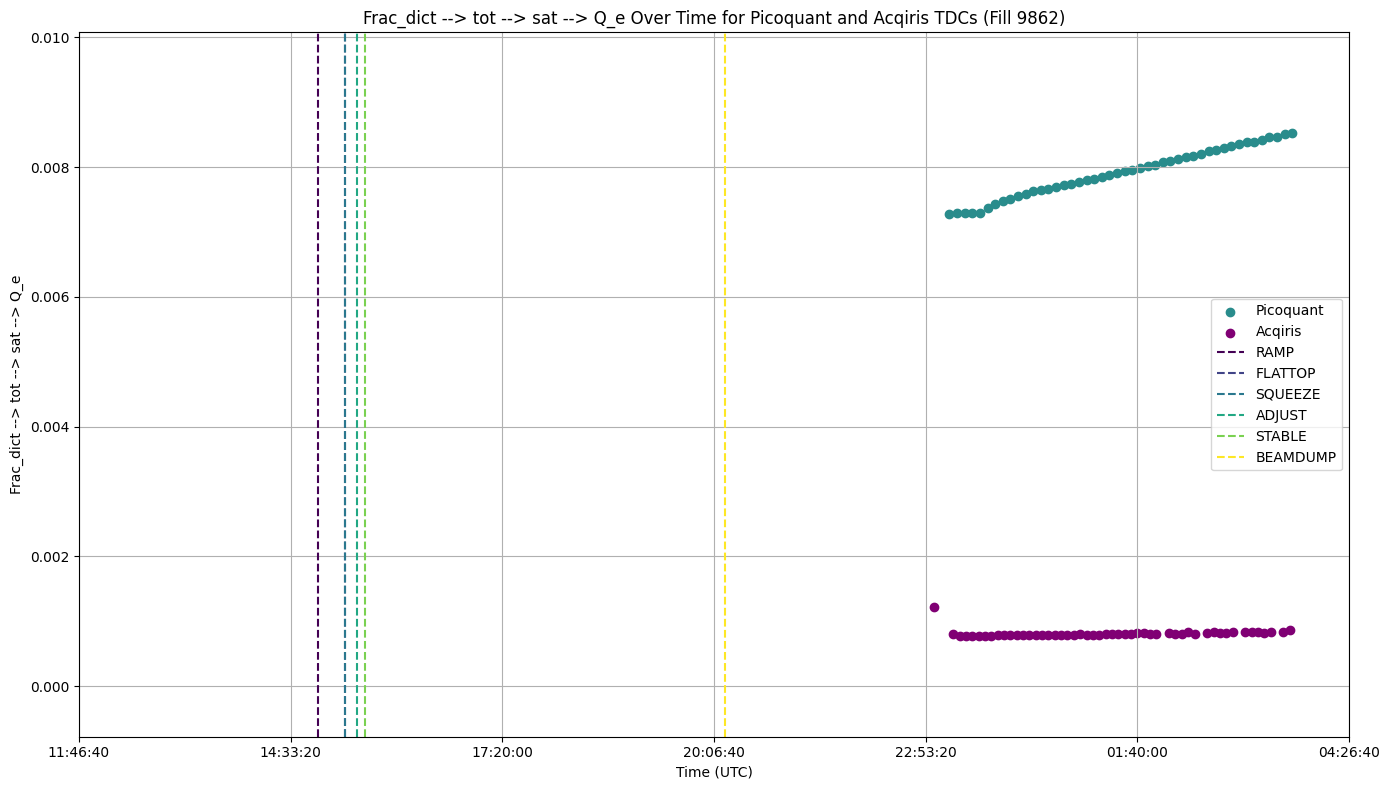

In [13]:
selected_fill_filepath = 'fill_9864'

for nested_keys in unique_values: 

#nested_keys = ['Frac_dict', 'tot', 'filled', 'sigma_stat_e']
#dict_keys(['Q', 'Q_e', 'Q_inv', 'Q_inv_e', 'Q_inv_o', 'Q_o', 'Q_val', 'Q_val_e', 'Q_val_o', 'sigma', 'sigma_stat', 'sigma_stat_e', 'sigma_stat_o', 'sigma_syst', 'sigma_syst_e', 'sigma_syst_o', 'sigma_val', 'sigma_val_e', 'sigma_val_o'])
#nested_keys = ['bucket_width']
#nested_keys = ['Bunch_dict', 'fwhm'] # Get the bunch length 
     parameter_label = label = " --> ".join(nested_keys)

     plot_tdc_parameter_with_markers_and_slopes(selected_fill_filepath, nested_keys, parameter_label, fills_filepath, add_markers=True, slope_comparison=False)

# Data Visualization Over All Fills 

In [15]:
import os
import pickle
import pandas as pd

def flatten_dict(d, parent_key='', sep='_'):
    """
    Recursively flatten a nested dictionary.

    Args:
        d (dict): The dictionary to flatten.
        parent_key (str): The base key to prepend.
        sep (str): Separator between levels.

    Returns:
        dict: A flattened dictionary.
    """
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

def extract_nested_value(data, keys):
    """
    Extracts the value of a nested key path from a dictionary.

    Args:
        data (dict): The dictionary to search.
        keys (list): The list of keys defining the path.

    Returns:
        Any: The value at the specified nested key path, or None if not found.
    """
    for key in keys:
        if isinstance(data, dict) and key in data:
            data = data[key]
        else:
            return None
    return data

def collect_data(analysis_filepath, user_keys_list): 

    # Get all available fill directories
    available_fills_filepath = [
        os.path.join(analysis_filepath, f) for f in os.listdir(analysis_filepath)
        if os.path.isdir(os.path.join(analysis_filepath, f))
    ]

    # List to store extracted data
    data = []

    # Process each fill
    for fill_filepath in available_fills_filepath:
        fill_id = fill_filepath.split('/')[-1].split('_')[-1]
        dev_files = os.listdir(fill_filepath)

        # Find Acquiris and Picoquant files
        acquiris_file = next(file for file in dev_files if 'acquiris' in file)
        picoquant_file = next(file for file in dev_files if 'picoquant' in file)

        # Load Acquiris data
        with open(os.path.join(fill_filepath, acquiris_file), 'rb') as file:
            acquiris_data = pickle.load(file)

        # Load Picoquant data
        with open(os.path.join(fill_filepath, picoquant_file), 'rb') as file:
            picoquant_data = pickle.load(file)
        
        # Extract specified keys from Acquiris data
        for timestamp, device_data in acquiris_data.items():
            for user_keys in user_keys_list:
                value = extract_nested_value(device_data, user_keys)
                if value is not None:
                    data.append({
                        "Fill ID": fill_id,
                        "Timestamp": timestamp,
                        "Source": "Acquiris",
                        "Key Path": " -> ".join(user_keys),  
                        "Value": value
                    })

        # Extract specified keys from Picoquant data
        for timestamp, device_data in picoquant_data.items():
            for user_keys in user_keys_list:
                value = extract_nested_value(device_data, user_keys)
                if value is not None:
                    data.append({
                        "Fill ID": fill_id,
                        "Timestamp": timestamp,
                        "Source": "Picoquant",
                        "Key Path": " -> ".join(user_keys),
                        "Value": value
                    })

    return data 

In [41]:
analysis_filepath = '../online_analysis_data'
# user_keys_list = [
#     ['Frac_dict', 'tot', 'sat', 'sigma'],
#     ['Frac_dict', 'tot', 'ghost', 'sigma'],
#     ['Frac_dict', 'tot', 'filled', 'sigma'], 
#     ['Frac_dict', 'tot', 'sat', 'Q'],
#     ['Frac_dict', 'tot', 'ghost', 'Q'],
#     ['Frac_dict', 'tot', 'filled', 'Q'], 
#     ['Bunch_dict', 'fwhm'],
#     ['bucket_width'], 
#     ['bucket_offset']
# ]

user_keys_list = [
    ['Bunch_dict', 'fwhm']
]
data = collect_data(analysis_filepath, user_keys_list)
df = pd.DataFrame(data)
print(df.head())


  Fill ID            Timestamp    Source            Key Path  \
0    9861  2024-07-05T13:15:01  Acquiris  Bunch_dict -> fwhm   
1    9861  2024-07-05T11:20:02  Acquiris  Bunch_dict -> fwhm   
2    9861  2024-07-05T13:25:01  Acquiris  Bunch_dict -> fwhm   
3    9861  2024-07-05T11:30:02  Acquiris  Bunch_dict -> fwhm   
4    9861  2024-07-05T13:35:01  Acquiris  Bunch_dict -> fwhm   

                                               Value  
0  [17.367178714861666, 17.103527768075537, 17.25...  
1  [17.229790603869333, 17.315694434251327, 17.17...  
2  [17.02977323944515, 17.14041857174493, 17.3168...  
3  [17.40220112237307, 17.141857800414527, 17.254...  
4  [17.058112231545692, 17.2494959651508, 17.2350...  


In [42]:
print(df['Value'].head())

0    [17.367178714861666, 17.103527768075537, 17.25...
1    [17.229790603869333, 17.315694434251327, 17.17...
2    [17.02977323944515, 17.14041857174493, 17.3168...
3    [17.40220112237307, 17.141857800414527, 17.254...
4    [17.058112231545692, 17.2494959651508, 17.2350...
Name: Value, dtype: object


In [43]:
# Expand 'Value' column by computing the mean of the list for each row
df['Value Mean'] = df['Value'].apply(lambda x: sum(x) / len(x))

# Group by 'Fill ID' and calculate the mean of 'Value Mean'
mean_values_per_fill = df.groupby('Fill ID')['Value Mean'].mean().reset_index()

# Display the result
print(mean_values_per_fill)


   Fill ID  Value Mean
0     9861   23.337460
1     9862   24.446376
2     9864   24.320643
3     9865   24.089214
4     9867   25.112156
5     9869   24.205345
6     9871   24.303584
7     9873   24.181055
8     9877   24.241438
9     9878   24.197000
10    9879   23.971241
11    9883   24.142763
12    9885   24.710049
13    9886   24.052198


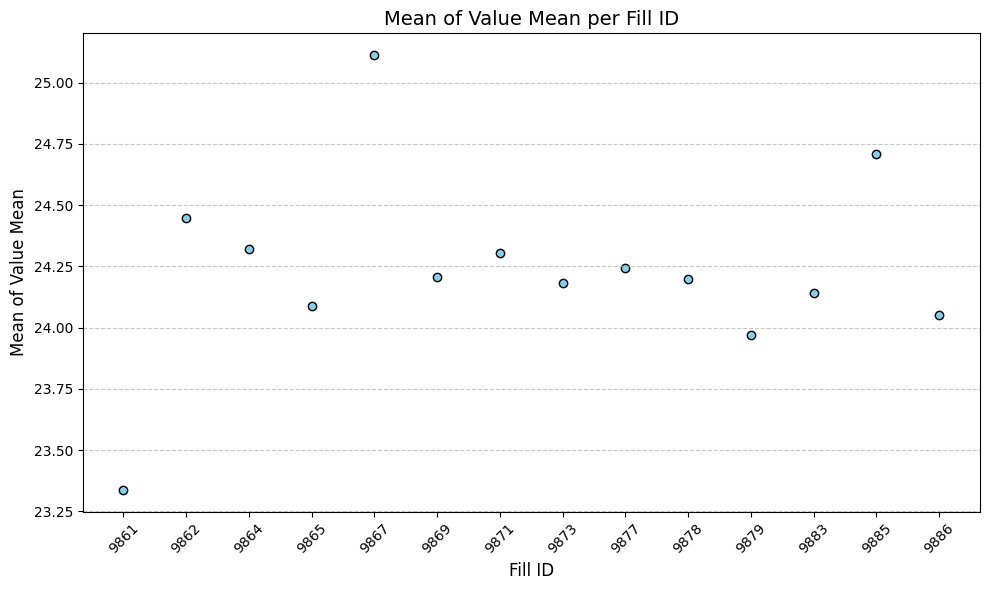

In [45]:
import matplotlib.pyplot as plt

# Plot the grouped means per Fill ID
plt.figure(figsize=(10, 6))
plt.scatter(mean_values_per_fill['Fill ID'], mean_values_per_fill['Value Mean'], color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('Fill ID', fontsize=12)
plt.ylabel('Mean of Value Mean', fontsize=12)
plt.title('Mean of Value Mean per Fill ID', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
mean_values_per_fill_key = df.groupby(['Fill ID', 'Key Path'])['Value'].mean().reset_index()
print(mean_values_per_fill_key)

    Fill ID                                  Key Path         Value
0      9861           Frac_dict -> tot -> filled -> Q  9.862421e-01
1      9861  Frac_dict -> tot -> filled -> sigma_stat  2.899930e-08
2      9861            Frac_dict -> tot -> ghost -> Q  1.079143e-03
3      9861        Frac_dict -> tot -> ghost -> sigma  8.878994e-07
4      9861              Frac_dict -> tot -> sat -> Q  1.267877e-02
..      ...                                       ...           ...
107    9886        Frac_dict -> tot -> ghost -> sigma  3.253088e-07
108    9886              Frac_dict -> tot -> sat -> Q  2.784316e-03
109    9886          Frac_dict -> tot -> sat -> sigma  1.912866e-06
110    9886                             bucket_offset  4.262370e+01
111    9886                              bucket_width  7.266346e+01

[112 rows x 3 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


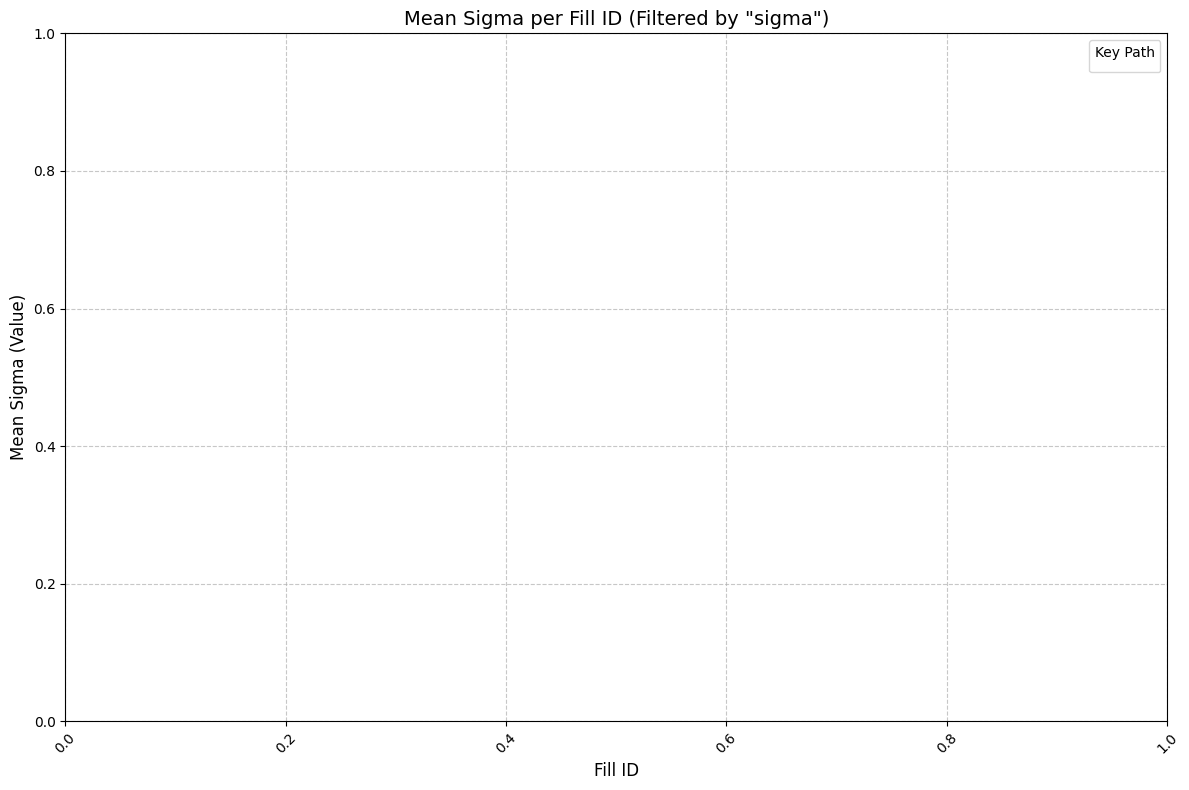

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Value' is numeric
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Drop rows with NaN in 'Value'
df = df.dropna(subset=['Value'])

# Group by 'Fill ID' and 'Key Path' and calculate the mean of 'Value'
mean_values_per_fill_key = df.groupby(['Fill ID', 'Key Path'])['Value'].mean().reset_index()

# Filter key paths to include only those containing the chosen word
filtered_data = mean_values_per_fill_key[mean_values_per_fill_key['Key Path'].str.contains('fwhm', case=False)]

# Create the plot
plt.figure(figsize=(12, 8))

# Get unique key paths
unique_key_paths = filtered_data['Key Path'].unique()

# Plot each key path with a different color
for key_path in unique_key_paths:
    subset = filtered_data[filtered_data['Key Path'] == key_path]
    plt.plot(subset['Fill ID'], subset['Value'], marker='o', linestyle='-', label=key_path)

# Customize the plot
plt.xlabel('Fill ID', fontsize=12)
plt.ylabel('Mean Sigma (Value)', fontsize=12)
plt.title('Mean Sigma per Fill ID (Filtered by "sigma")', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Key Path', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


In [2]:
import pandas as pd

# Set display precision (optional for visual inspection)
pd.set_option('display.float_format', '{:.10f}'.format)

# Calculate and print the mean
mean_value = df['Value'].mean()
print("Mean of the Value column:", mean_value)

Mean of the Value column: 1.6290870363554078e-06


In [3]:
print(df['Value'].dtype)  

float64


In [20]:
from sklearn.linear_model import LinearRegression
import traceback
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def plot_tdc_parameter_with_markers_and_slopes(file_path, nested_keys, parameter_label, fills_filepath, add_markers=True, slope_comparison=False):
    try:

        # Get beam mode start times if markers are needed
        start_times_of_modes = []
        start_times_of_modes = get_mode_starts_from_one_fill(fills_filepath, fill_number)

        # Load the TDC data from the pickle files
        dev_files = os.listdir(file_path)
        acquiris_file = next(file for file in dev_files if 'acquiris' in file)
        picoquant_file = next(file for file in dev_files if 'picoquant' in file)

        with open(os.path.join(file_path, acquiris_file), 'rb') as file:
            acquiris_data = pickle.load(file)

        with open(os.path.join(file_path, picoquant_file), 'rb') as file:
            picoquant_data = pickle.load(file)

        print(len(picoquant_data.keys()))
        print(len(acquiris_data.keys()))

        # Define configurations for the 2 TDCs
        tdcs = {
            "picoquant": {"data": picoquant_data, "color": "#298c8c", "label": "Picoquant"},
            "acquiris": {"data": acquiris_data, "color": "#800074", "label": "Acqiris"}
        }

        plt.figure(figsize=(12, 6))

        # Dictionary to store extracted times and parameter values for each TDC
        plot_data = {}

        for tdc_name, _ in tdcs.items():
            
                data = picoquant_data if tdc_name == "picoquant" else acquiris_data
                plot_data[tdc_name] = {"times": [], "values": []}

                for timestamp, values in data.items():
                    parameter_value = get_nested_value(values, nested_keys)                
                    try:
                        if type(parameter_value) == 'list' and len(parameter_value) == 1:
                            parameter_value = float(parameter_value)
                            
                        # Adjust for specific parameters in Picoquant
                        if nested_keys[-1] in ['bucket_width', 'bucket_offset'] and tdc_name == 'picoquant':
                            parameter_value /= 2

                        if nested_keys[-1] in ['fwhm'] and 'Bunch_dict' in nested_keys:
                            if tdc_name == 'picoquant':
                                parameter_value = parameter_value.mean() * 25e-12  # Picoquant scaling
                            else:
                                parameter_value = parameter_value.mean() * 50e-12  # Acqiris scaling
            
                        # # Use for the plot only the timestamps between the RAMP and the BEAMDUMP of the fill 
                        # ramp_start = datetime.strptime(start_times_of_modes['RAMP'], "%Y-%m-%d %H:%M:%S")
                        # beamdump_start = datetime.strptime(start_times_of_modes['BEAMDUMP'], "%Y-%m-%d %H:%M:%S")
                        event_time = datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%S")

                        # if ramp_start <= event_time <= beamdump_start:
                        plot_data[tdc_name]["times"].append(event_time.timestamp())
                        plot_data[tdc_name]["values"].append(parameter_value)
                            
                    except (ValueError, TypeError) as e:
                        traceback.print_exc()
            
        # Plot the data 
        
        plt.figure(figsize=(14, 8))

        slopes = {}

        for tdc_name, tdc_data in plot_data.items():
            if tdc_data["times"] and tdc_data["values"]:  
                plt.scatter(
                    tdc_data["times"],
                    tdc_data["values"],
                    color=tdcs[tdc_name]["color"],
                    label=tdcs[tdc_name]["label"]
                )

            if slope_comparison:
                times_np = np.array(tdc_data["times"]).reshape(-1, 1)
                values_np = np.array(tdc_data["values"])

                reg = LinearRegression().fit(times_np, values_np)
                slope = reg.coef_[0]
                slopes[tdc_name] = slope

                # Plot regression line
                regression_line = reg.predict(times_np)
                plt.plot(
                    tdc_data["times"],
                    regression_line,
                    linestyle='-',
                    color=tdcs[tdc_name]["color"],
                    label=f"{tdcs[tdc_name]['label']} Slope: {slope:.2e}"
                )

        if add_markers:
            # Filter modes between RAMP and BEAMDUMP
            keys = list(start_times_of_modes.keys())
            ramp_index = keys.index('RAMP')
            stable_index = keys.index('BEAMDUMP')
            selected_keys = keys[ramp_index:stable_index + 1]
            selected_modes = {key: start_times_of_modes[key] for key in selected_keys}

            # Set up colormap
            mode_start_colors = cm.get_cmap('viridis', len(selected_modes))
            start_handles = []
            timestamp_labels = []

            # Iterate over filtered modes
            for i, (mode_name, mode_start_time) in enumerate(selected_modes.items()):
                mode_start_time_utc = datetime.strptime(mode_start_time, "%Y-%m-%d %H:%M:%S").timestamp()

                # Plot vertical line for each mode
                start_line = plt.axvline(
                    x=mode_start_time_utc, color=mode_start_colors(i), linestyle='--'
                )
                start_handles.append(start_line)
                timestamp_labels.append(f"{mode_name}")

            # Collect handles and labels for TDC scatter plots
            tdc_handles, tdc_labels = plt.gca().get_legend_handles_labels()
            combined_handles = tdc_handles + start_handles
            combined_labels = tdc_labels + timestamp_labels
            plt.legend(
                combined_handles,
                combined_labels,
                loc='center right',
                bbox_to_anchor=(1, 0.5)
            )
            
        else: 
            tdc_legend = plt.legend(title="TDCs", loc='center right', bbox_to_anchor=(1, 0.35))
                        
        plt.gca().set_xticks(plt.gca().get_xticks())
        xtick_labels = [datetime.utcfromtimestamp(t).strftime('%H:%M:%S') for t in plt.gca().get_xticks()]
        plt.gca().set_xticklabels(xtick_labels)

        plt.xlabel("Time (UTC)")
        plt.ylabel(parameter_label)
        plt.title(f"{parameter_label} Over Time for Picoquant and Acqiris TDCs (Fill {fill_number})")

        # Calculate y-axis limits
        all_values = []
        for tdc_name, tdc_data in plot_data.items():
            all_values.extend(tdc_data["values"])  # Collect all values from both TDCs

        if all_values:
            y_min = min(all_values)
            y_max = max(all_values)
            y_range = y_max - y_min
            y_margin = 0.2 * y_range  # 20% of the range
            y_min_limit = y_min - y_margin
            y_max_limit = y_max + y_margin

            # Apply the calculated limits
            plt.ylim(y_min_limit, y_max_limit)
        
        plt.grid(True)
        plt.tight_layout()
        plt.show()
                    
            
    except Exception as e:
        traceback.print_exc()